In [290]:
# standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import DataFrame

# different metrics and scoring methods
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
)
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import precision_score as precision
from sklearn.metrics import recall_score as recall
from sklearn.metrics import f1_score as f1
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# for hyperparameter tuning
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# to save the best model
import pickle

---
The line of code below is only used to read in the locally stored X_train, X_test, y_train, y_test data.

In [38]:
X_train = pd.read_csv("/Users/elocher/Computer_Science/FCS_Group/Data_for_modeling/X_train.csv")
X_test = pd.read_csv("/Users/elocher/Computer_Science/FCS_Group/Data_for_modeling/X_test.csv")
y_train = pd.read_csv("/Users/elocher/Computer_Science/FCS_Group/Data_for_modeling/y_train.csv")
y_test = pd.read_csv("/Users/elocher/Computer_Science/FCS_Group/Data_for_modeling/y_test.csv")

In [88]:
X_train

,traffic_volume_0_period_0,traffic_volume_1_period_0,traffic_volume_2_period_0,traffic_volume_0_period_1,traffic_volume_1_period_1,traffic_volume_2_period_1,pedestrian_volume_0_period_0,pedestrian_volume_1_period_0,pedestrian_volume_2_period_0,pedestrian_volume_0_period_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,-0.343188,-0.259128,-0.527920,-0.110299,0.170852,-0.081870,0.150599,0.209563,0.466944,-0.279617,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.409243,-0.141882,0.324138,0.220024,-0.091723,0.021292,0.635557,-0.670434,0.151812,1.089513,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.356221,1.177136,-0.973373,-0.521110,-0.647451,-1.170223,-0.676681,-0.720720,-0.714800,-0.666545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.741547,-0.732997,-0.489072,-0.725046,-0.752259,-0.396512,0.065019,-0.695577,2.095124,-0.368908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.659526,0.060856,0.010767,-1.016028,-0.798570,-0.902003,-0.676681,-0.720720,-0.714800,-0.666545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46058,0.516119,-0.034406,0.583122,0.391628,-0.103910,0.508729,0.435869,-0.419006,-0.609756,0.821640,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46059,1.768815,1.949006,0.210185,1.814207,1.819202,0.225036,0.350288,0.008421,-0.058275,-0.041508,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46060,-1.218765,-1.226408,-1.076967,-1.219964,-1.225116,-1.175381,-0.676681,-0.720720,-0.609756,-0.666545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46061,-0.110229,0.446791,-1.035529,-0.123186,0.666310,-0.984532,-0.305831,-0.670434,-0.688539,-0.577254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Important Note**: 
The following datasets are no longer created in this code, as they were our first MVP. They are just included to illustrate our progress since then, but you can just skip them.

In [144]:
# Data for the first simple Model (before adding more features)
X_train1 = pd.read_csv("/Users/elocher/Computer_Science/FCS_Group/Data_for_modeling/X_train1.csv")
X_test1 = pd.read_csv("/Users/elocher/Computer_Science/FCS_Group/Data_for_modeling/X_test1.csv")
y_train1 = pd.read_csv("/Users/elocher/Computer_Science/FCS_Group/Data_for_modeling/y_train1.csv")
y_test1 = pd.read_csv("/Users/elocher/Computer_Science/FCS_Group/Data_for_modeling/y_test1.csv")

In [145]:
# transform y_train and y_test to 1D array
y_train1 = y_train1.values.ravel()
y_test1 = y_test1.values.ravel()

---

In [3]:
X_train = pd.read_csv("../data/training/X_train.csv")
X_test = pd.read_csv("../data/training/X_test.csv")
y_train = pd.read_csv("../data/training/y_train.csv")
y_test = pd.read_csv("../data/training/y_test.csv")

In [39]:
y_test['AccidentSeverityCategory'].value_counts()

AccidentSeverityCategory
0    8607
1    2909
Name: count, dtype: int64

`Class 0` represents accidents with property damage, while `class 1` stands for accidents with personal injuries (includes accident with minor injuries, accident with serious injuries and accident with fatalities). 

As we have to deal with imbalanced classes it makes more sense to create a binary classification problem.

In [40]:
# transform y_train and y_test to 1D array
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [19]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

# Creating some functions to calculate the result of our models and to visualize them

Please note that the Accuracy, Precision, Recall and F1-Score are "threshold-dependent". That means by changing the threshold, these scores will change. Therefore there is not a "right" or "wrong" threshold. We will use the J-statistic to calculate the "optimal" threshold.  The J-statistic evaluates the model's ability to differentiate between positive and negative classes. The maximum J-statistic then indicates the threshold value at which the classifier achieves the best separation between the two classes. With a value of 1 we would have a perfect classification, with a value of 0 no separation ability (i.e. the classification would correspond to randomness). 

This implies that these scores are difficult to compare in the data frame shown below (after each model), as a different threshold is used in each case. This is also the reason why we perform the hyperparameter tuning based on the ROC-AUC score. The ROC-AUC score is independent of the threshold, as it uses the predicted probabilities directly and not the subsequently assigned classes using the threshold.


In [ ]:
# We are going to create many models, let us keep track of their performance
# We will use a dataframe to store the results of the different models
results2 = pd.DataFrame({"Model": [], "Train_CV": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": [], "Best Threshold (J-statistic)": []})

In [212]:
# We create a scorer that computes the given scores (accuracy, precision, recall and f1-score) 
def make_scorefunc(loss_func, greater_is_better=True):
    def scorer(y, y_pred):
        return loss_func(y, y_pred)
    return make_scorer(scorer, greater_is_better=greater_is_better)

In [ ]:
# Create the scorer dictionaries
scorer = {
    "Accuracy": make_scorefunc(accuracy),
    "Precision": make_scorefunc(precision),
    "Recall": make_scorefunc(recall),
    "F1-Score": make_scorefunc(f1)
}

In [214]:
def compute_metrics(model, X_train, y_train, X_test, y_test, scorer, model_name=None):
    # Extract the names from the scorer dictionary
    scorer_names = list(scorer.keys())

    # Fit the model to the training set
    model.fit(X_train, y_train)
    
    ### Visualization and Metric Calculation ###
    # Predict probabilities (for ROC curve and custom thresholding)
    y_probs = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Calculate the J-statistic and find the optimal threshold
    j_statistic = tpr - fpr
    optimal_idx = j_statistic.argmax()
    optimal_threshold = thresholds[optimal_idx]

    # Predict labels using the optimal threshold
    y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

    # Create a dictionary for the pandas dataframe
    test_scores = {"Model": model_name, "Train_CV": "Test", "Best Threshold (J-statistic)": optimal_threshold}
    
    # Iterate over the scorers, now using y_test and y_pred_optimal
    for k in scorer_names:
        score_func = scorer[k]._score_func  # Extract the scoring function
        test_scores[k] = score_func(y_test, y_pred_optimal)  # Use y_pred_optimal

    # Append the results to the dataframe
    test_scores = pd.DataFrame(test_scores, index=[0])

    # Compute confusion matrix for the optimal threshold
    cm = confusion_matrix(y_test, y_pred_optimal)

    # Compute ROC area
    roc_auc = auc(fpr, tpr)

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax1, cmap='Blues', colorbar=False)
    ax1.set_title('Confusion Matrix (Optimal Threshold)')
    ax1.set_xlabel('Predicted Label')
    ax1.set_ylabel('True Label')
    ax1.grid(False)

    # Calculate percentages for the confusion matrix
    cm_percent = cm / cm.sum() * 100  # Divide each cell by the total sum of the matrix to get percentages

    # Annotate with percentages below the numbers
    for i in range(cm.shape[0]):  # Iterate over rows
        for j in range(cm.shape[1]):  # Iterate over columns
            percentage = f"{cm_percent[i, j]:.1f}%"  # Format percentage
            ax1.text(j, i + 0.3, percentage, ha="center", va="center", fontsize=10, color="black")  # Add below numbers

    # Plot ROC curve
    ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax2.scatter(fpr[optimal_idx], tpr[optimal_idx], color="red", 
                label=f"Optimal Threshold: {optimal_threshold:.5f}", zorder=5)
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax2.legend(loc='lower right')

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

    return test_scores

# 1. Logistic Regression

## 1.1 LogisticRegression with simple Features 
#### For this model you should use the train1.csv and test1.csv data!!!

This data represents our first approach. We have create a dataframe with relatively few features. As the model performance wasn't that good, we added much more features to our dataframe and trained new models (see bellow).

In [215]:
# Initialize the logistic regression model
log_reg = LogisticRegression(solver='liblinear')  # 'liblinear' is good for small datasets

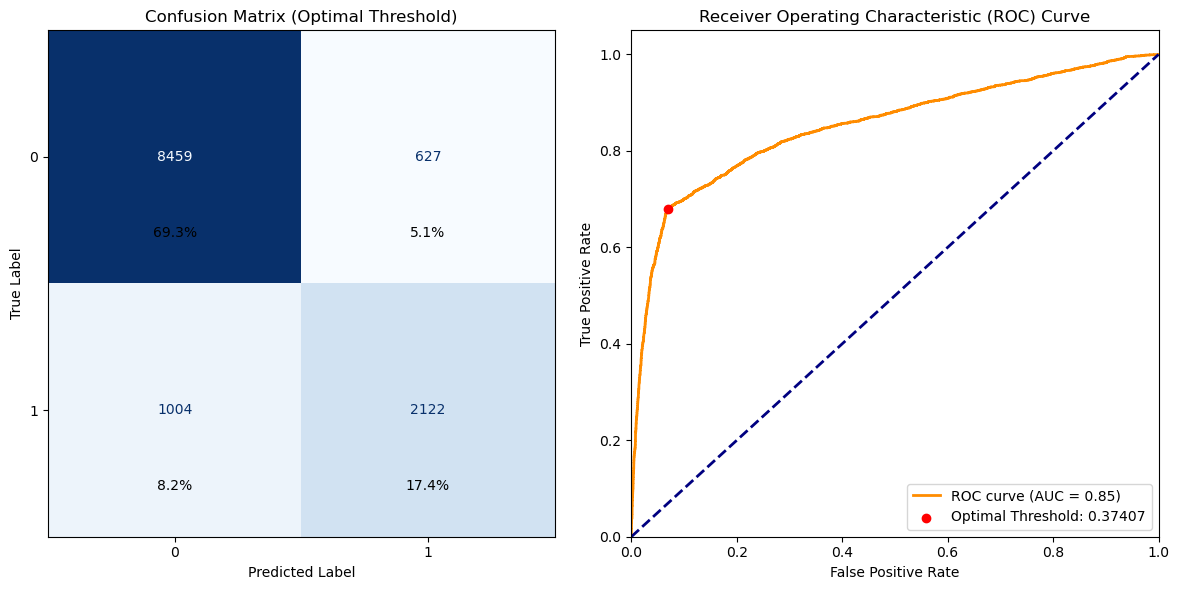

In [216]:
log_reg_score = compute_metrics(log_reg, X_train1, y_train1, X_test1, y_test1, scorer=scorer, model_name="Logistic Regression1")

In [217]:
results2 = pd.concat([results2, log_reg_score], axis=0)

In [218]:
results2

,Model,Train_CV,Accuracy,Precision,Recall,F1-Score,Best Threshold (J-statistic)
0,Logistic Regression1,Test,0.866443,0.771917,0.678823,0.722383,0.374071


## 1.2 LogisticRegression with more Features

**Logistic regression** is a simple linear model used to calculate probabilities for binary classifications. It models the probability of an event (in our case personal injury or property damage) occurring based on the input features by applying a logistic function (sigmoid) to a linear combination of the features.

**Advantages:**
+ Simplicity and interpretability: Easy to implement and easy to understand, which facilitates the interpretation of the model parameters.
+ Efficient for linear relationships: Very effective when the relationship between the features and the target variable is approximately linear.

**Disadvantages:**
+ Limited flexibility: logistic regression has difficulty modelling non-linear relationships.
+ Sensitive to outliers: It is not particularly robust to outliers in the data.
+ Difficult with unbalanced classes: Can produce sub-optimal results with highly unbalanced data sets (as in our case with the many property losses).

In [219]:
# Initialize the logistic regression model
log_reg2 = LogisticRegression(solver='liblinear')  # 'liblinear' is good for small datasets

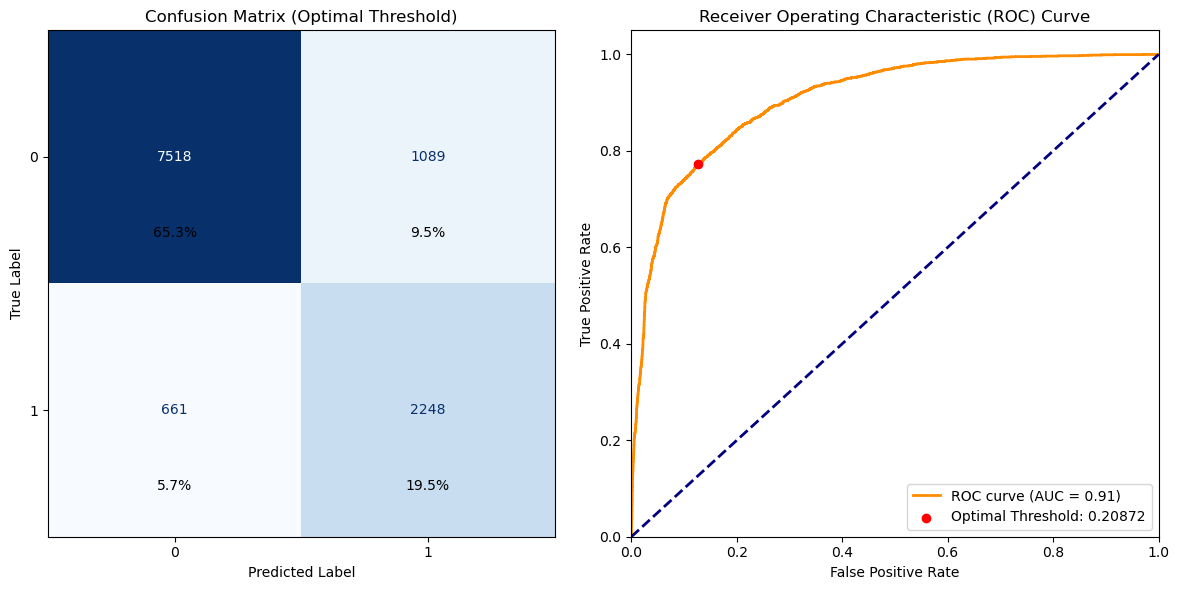

In [220]:
log_reg_scores2 = compute_metrics(log_reg2, X_train, y_train, X_test, y_test, scorer=scorer, model_name="Logistic Regression2")

In [221]:
results2 = pd.concat([results2, log_reg_scores2], axis=0)

In [222]:
results2

,Model,Train_CV,Accuracy,Precision,Recall,F1-Score,Best Threshold (J-statistic)
0,Logistic Regression1,Test,0.866443,0.771917,0.678823,0.722383,0.374071
0,Logistic Regression2,Test,0.848038,0.673659,0.772774,0.719821,0.208721


We see that the accuracy score is lower than before. But the ROC curve shows us, that we have a better model. For us, the recall score is extremly important as we want to reduce the False Positives (that means wrongly predicted property demage while a person was injured). The recall score has extremly improved from 0.67 to 0.77.

# 2. RandomForest

The **RandomForestClassifier** is an ensemble learning method that trains a large number of decision trees and combines the predictions of the individual trees. Each tree is built on a random sample of training data with a random selection of features, reducing overfitting and making the model more robust.

**Advantages:**
+ Non-linear relationships: Can model complex, non-linear relationships between features.
+ Handling of unbalanced datasets: It can handle unbalanced datasets well, especially when using the class_weight parameter.

**Disadvantages:**

+ Interpretability: The model is less interpretable than logistic regression because it is based on a large number of trees.
+ Computationally intensive: Random forests are memory and computationally intensive, especially with a large number of trees or features.
+ Slow predictions: The prediction speed can suffer with very large data sets or many trees.

## 2.1 Hyperparameter-Tuning Approach:
We want to use a more systematic approach in finding the optimal hyperparameters of the Random Forest (RF). Therefore we will start with a RandomizedSearchCV. Once we have found the ‘best’ hyperparameters, we want to define a slightly narrower interval around these hyperparameters and then try to increase the performance of the model using BayesSearchCV.

### Hyperparameters for RandomForest:

For the RandomForestClassifier, there are the following hyperparameters that we want to focus on:

#### Hyperparameters for the tree structure:

1. `max_depth` = The maximum depth of the individual trees.

The greater the depth of the trees, the more complex the structures/patterns can become. A high depth can result in overfitting, as the trees adapt too closely to the training data. Conversely, a smaller value reduces the model complexity.

---

2. `min_samples_split` = The minimum number of samples required to split a node.

A higher value leads to fewer trees, which can reduce overfitting.

---

3. `min_samples_leaf` = Minimum number of samples that a leaf node must have.

A higher value leads to "smoother" decision boundaries, thus reducing overfitting.

---

4. `max_features` = The maximum number of features considered when searching for the best split.

---

#### Hyperparameters that influence the number of trees in the forest:

5. `n_estimators` = Number of trees in the forest.

Higher values (i.e., number of trees) often improve performance but also increase training time.

---

6. `bootstrap` = Can be set to "True" or not. If set to "True", bootstrapping (sampling with replacement) is used when creating the trees.

---

#### Hyperparameters that influence the quality of the splits:

7. `class_weight` = Weighting of the classes in unbalanced datasets. This is particularly important for us as we are dealing with an unbalanced dataset.

---

## 2.2 Approach with RandomizedSearchCV

*Note:* The code below for the RandomisedSearchCV was run twice in total. The ‘best’ hyperparameters were written out manually in each case and then the score of the RF with the corresponding hyperparameters was printed out. This is why you can see 2 hyperparameter combinations after the RandomisedSearchCV below.

In [ ]:
# DO NOT RUN THIS CELL AS IT TAKES MORE THAN 9.5 HOURS TO RUN!


# Define the parameter range for the RandomizedSearchCV
param_dist = {
    'n_estimators': randint(400, 1000),  # randomized values between 400 and 1000
    'max_depth': [None] + list(range(5, 30, 5)),  # None or values from 5 to 25 in 5-er steps
    'min_samples_split': randint(2, 10),  # values from 2 to 10
    'min_samples_leaf': randint(1, 10),  # values from 1 to 10
    'max_features': ['sqrt', 'log2', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],  # sqrt, log2, or fraction (0.1 to 0.7)
    'bootstrap': [True, False],  # True or False
    'class_weight': [None, 'balanced']  # None or 'balanced'
}

# define base model
forest_rs = RandomForestClassifier(random_state=74)

# StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=74)

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=forest_rs,
                                   param_distributions=param_dist,
                                   n_iter=70,  # number of random configuration that will be tested
                                   cv=cv,  # StratifiedKFold as before
                                   scoring='roc_auc',  # ROC-AUC as Metric
                                   n_jobs=2,  # if -1, all processors are used
                                   random_state=74,  # reproducibility
                                   verbose=2)  # progress information

# fit RandomizedSearchCV on train data
random_search.fit(X_train, y_train)

# print best parameters
print("Beste Parameter aus RandomizedSearchCV:", random_search.best_params_)

# best model
best_model = random_search.best_estimator_


Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] END bootstrap=True, class_weight=balanced, max_depth=5, max_features=0.3, min_samples_leaf=6, min_samples_split=5, n_estimators=793; total time=  54.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=5, max_features=0.3, min_samples_leaf=6, min_samples_split=5, n_estimators=793; total time=  54.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=5, max_features=0.3, min_samples_leaf=6, min_samples_split=5, n_estimators=793; total time=  54.2s
[CV] END bootstrap=True, class_weight=balanced, max_depth=5, max_features=0.3, min_samples_leaf=6, min_samples_split=5, n_estimators=793; total time=  54.3s
[CV] END bootstrap=True, class_weight=balanced, max_depth=5, max_features=0.3, min_samples_leaf=6, min_samples_split=5, n_estimators=793; total time=  53.2s
[CV] END bootstrap=False, class_weight=balanced, max_depth=None, max_features=0.4, min_samples_leaf=6, min_samples_split=7, n_estimators=706; total time=

In [55]:
random_search.best_params_

{'bootstrap': True,
 'class_weight': None,
 'max_depth': 15,
 'max_features': 0.2,
 'min_samples_leaf': 6,
 'min_samples_split': 3,
 'n_estimators': 574}

In [ ]:
# save all results in a DataFrame
results_cv = random_search.cv_results_

# transform the results into a DataFrame
results_df = pd.DataFrame(results_cv)

# sort the results by the mean_test_score in descending order
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# second and third best hyperparameters
second_best_params = results_df.iloc[1]['params']  # second best Parameter
third_best_params = results_df.iloc[2]['params']  # third best Parameter

# print the second and third best hyperparameters
print("Second best Parameter:", second_best_params)
print("Third best Parameter:", third_best_params)

Second best Parameter: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 15, 'max_features': 0.2, 'min_samples_leaf': 7, 'min_samples_split': 3, 'n_estimators': 893}
Third best Parameter: {'bootstrap': True, 'class_weight': None, 'max_depth': 15, 'max_features': 0.2, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 490}


In [57]:
second_best_params

{'bootstrap': True,
 'class_weight': 'balanced',
 'max_depth': 15,
 'max_features': 0.2,
 'min_samples_leaf': 7,
 'min_samples_split': 3,
 'n_estimators': 893}

In [58]:
third_best_params

{'bootstrap': True,
 'class_weight': None,
 'max_depth': 15,
 'max_features': 0.2,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 490}

### 2.2.1 Try model with best Hyperparameters from RandomizedSearchCV Nr. 1

From the first run of the first RandomisedSearchCV we found the following best parameters:

```python
{'bootstrap': False,
 'class_weight': None,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 9,
 'n_estimators': 792}
 ```

In [223]:
# Best Hyperparameters from RandomizedSearchCV No. 1
best_params = {
    'bootstrap': False,
    'class_weight': None,
    'max_depth': 15,
    'max_features': 'sqrt',
    'min_samples_leaf': 4,
    'min_samples_split': 9,
    'n_estimators': 792
}

# Define Random-Forest-Model with the best Hyperparameters
rf_model_1 = RandomForestClassifier(
    random_state=42,  # Same random state for reproducibility
    **best_params  # Add the best hyperparameters
)

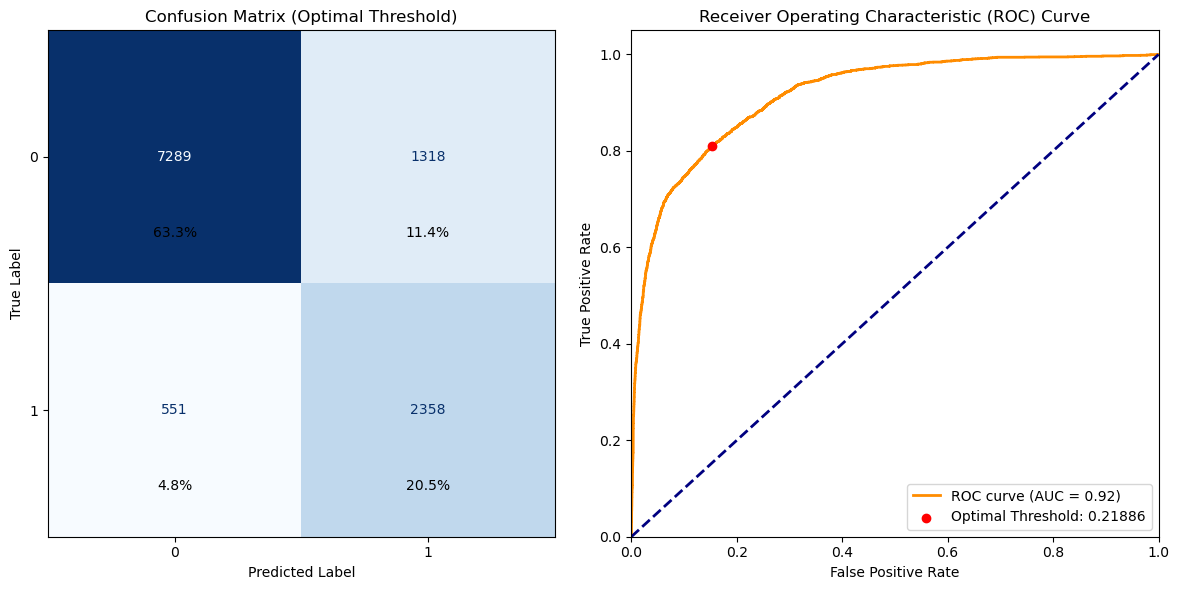

In [224]:
rf_1_scores = compute_metrics(rf_model_1, X_train, y_train, X_test, y_test, scorer=scorer, model_name="Random Forest 1")

In [225]:
results2 = pd.concat([results2, rf_1_scores], axis=0)

In [226]:
results2

,Model,Train_CV,Accuracy,Precision,Recall,F1-Score,Best Threshold (J-statistic)
0,Logistic Regression1,Test,0.866443,0.771917,0.678823,0.722383,0.374071
0,Logistic Regression2,Test,0.848038,0.673659,0.772774,0.719821,0.208721
0,Random Forest 1,Test,0.837704,0.641458,0.810588,0.716173,0.218860


Again the Recall increased from 0.77 to 0.81. But we also increased the AUC-score to 0.92!

### 2.2.2 Try models with best, second-best and third-best hyperparameters from RandomizedSearchCV Nr. 2

From the second execution of RandomisedSearchCV we found the following ‘optimal’ hyperparameters.

```python
{'bootstrap': True,
 'class_weight': None,
 'max_depth': 15,
 'max_features': 0.2,
 'min_samples_leaf': 6,
 'min_samples_split': 3,
 'n_estimators': 574}
 ```

The second-best hyperparameters of the 2nd RandomisedSearchCV run:
 ```python
 {'bootstrap': True,
 'class_weight': 'balanced',
 'max_depth': 15,
 'max_features': 0.2,
 'min_samples_leaf': 7,
 'min_samples_split': 3,
 'n_estimators': 893}
 ```

The third best hyperparameters of the 2nd RandomisedSearchCV run:
```python
{'bootstrap': True,
 'class_weight': None,
 'max_depth': 15,
 'max_features': 0.2,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 490}
 ```



In [227]:
# Best Hyperparameters from RandomizedSearchCV No. 2
best_params21 = {
    'bootstrap': True,
    'class_weight': None,
    'max_depth': 15,
    'max_features': 0.2,
    'min_samples_leaf': 6,
    'min_samples_split': 3,
    'n_estimators': 574
}

# Define Random-Forest-Model with the best Hyperparameters
rf_model_2_1 = RandomForestClassifier(
    random_state=42,  # Same random state for reproducibility
    **best_params21  # Add the best hyperparameters
)

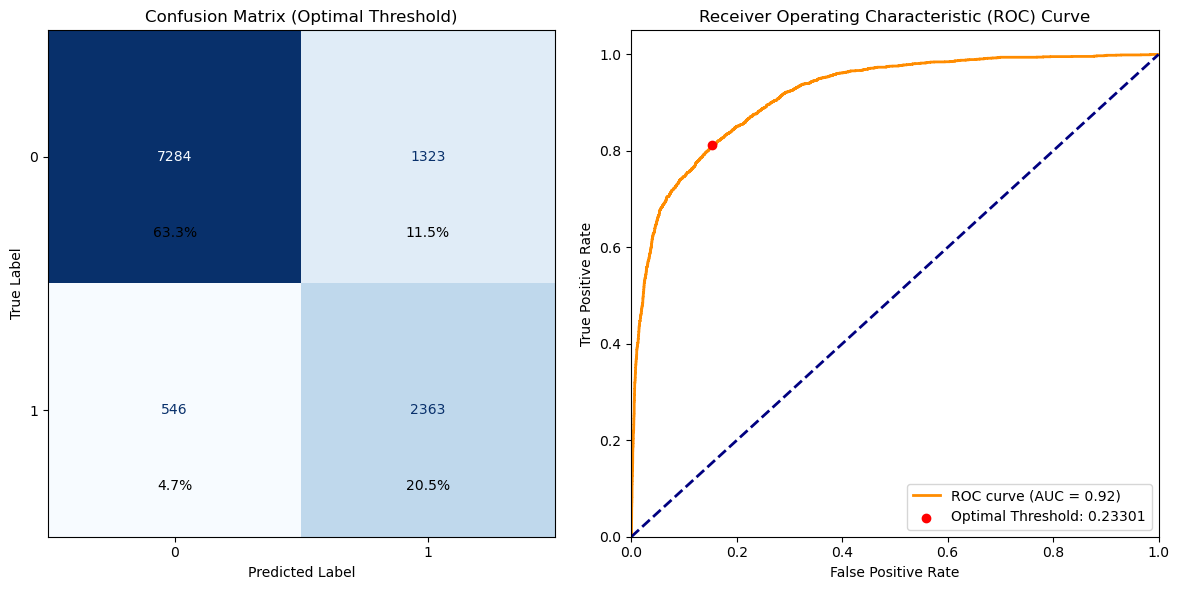

In [228]:
rf_2_1_scores = compute_metrics(rf_model_2_1, X_train, y_train, X_test, y_test, scorer=scorer, model_name="Random Forest 2.1")

In [229]:
results2 = pd.concat([results2, rf_2_1_scores], axis=0)

In [230]:
results2

,Model,Train_CV,Accuracy,Precision,Recall,F1-Score,Best Threshold (J-statistic)
0,Logistic Regression1,Test,0.866443,0.771917,0.678823,0.722383,0.374071
0,Logistic Regression2,Test,0.848038,0.673659,0.772774,0.719821,0.208721
0,Random Forest 1,Test,0.837704,0.641458,0.810588,0.716173,0.218860
0,Random Forest 2.1,Test,0.837704,0.641074,0.812307,0.716603,0.233006


In [231]:
# Second-best Hyperparameters from RandomizedSearchCV No. 2
best_params22 = {
    'bootstrap': True,
    'class_weight': 'balanced',
    'max_depth': 15,
    'max_features': 0.2,
    'min_samples_leaf': 7,
    'min_samples_split': 3,
    'n_estimators': 893
}

# Define Random-Forest-Model with the best Hyperparameters
rf_model_2_2 = RandomForestClassifier(
    random_state=42,  # Same random state for reproducibility
    **best_params22  # Add the best hyperparameters
)

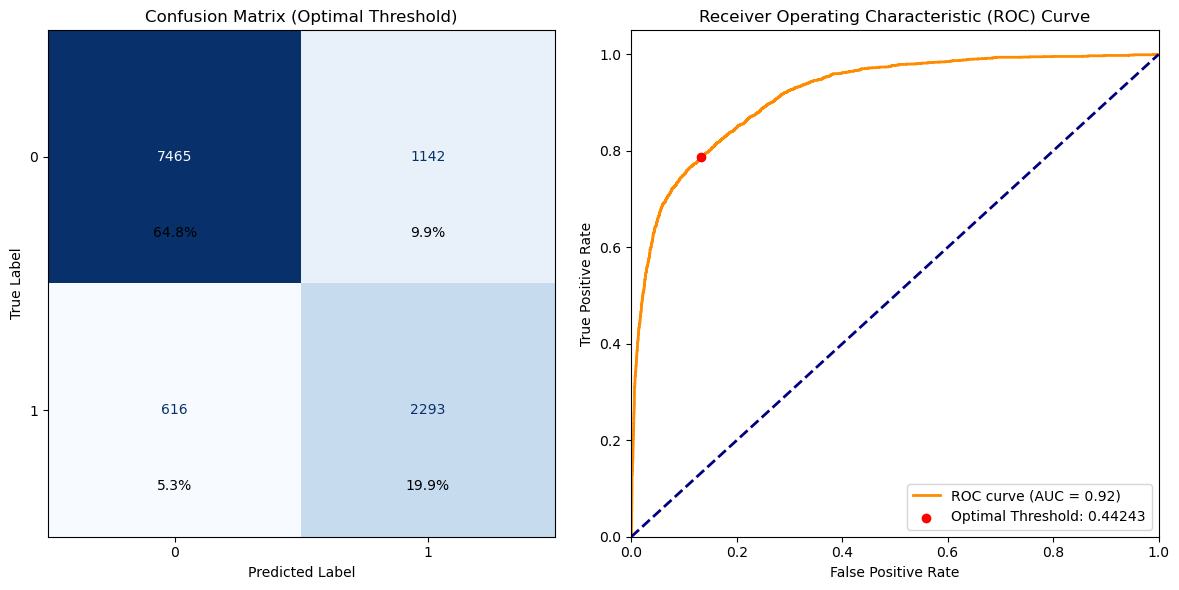

In [232]:
rf_2_2_scores = compute_metrics(rf_model_2_2, X_train, y_train, X_test, y_test, scorer=scorer, model_name="Random Forest 2.2")

In [233]:
results2 = pd.concat([results2, rf_2_2_scores], axis=0)

In [234]:
results2

,Model,Train_CV,Accuracy,Precision,Recall,F1-Score,Best Threshold (J-statistic)
0,Logistic Regression1,Test,0.866443,0.771917,0.678823,0.722383,0.374071
0,Logistic Regression2,Test,0.848038,0.673659,0.772774,0.719821,0.208721
0,Random Forest 1,Test,0.837704,0.641458,0.810588,0.716173,0.218860
0,Random Forest 2.1,Test,0.837704,0.641074,0.812307,0.716603,0.233006
0,Random Forest 2.2,Test,0.847343,0.667540,0.788243,0.722888,0.442431


In [235]:
# Third-best Hyperparameters from RandomizedSearchCV No. 2
best_params23 = {
    'bootstrap': True,
    'class_weight': None,
    'max_depth': 15,
    'max_features': 0.2,
    'min_samples_leaf': 3,
    'min_samples_split': 6,
    'n_estimators': 490
}

# Define Random-Forest-Model with the best Hyperparameters
rf_model_2_3 = RandomForestClassifier(
    random_state=42,  # Same random state for reproducibility
    **best_params23  # Add the best hyperparameters
)

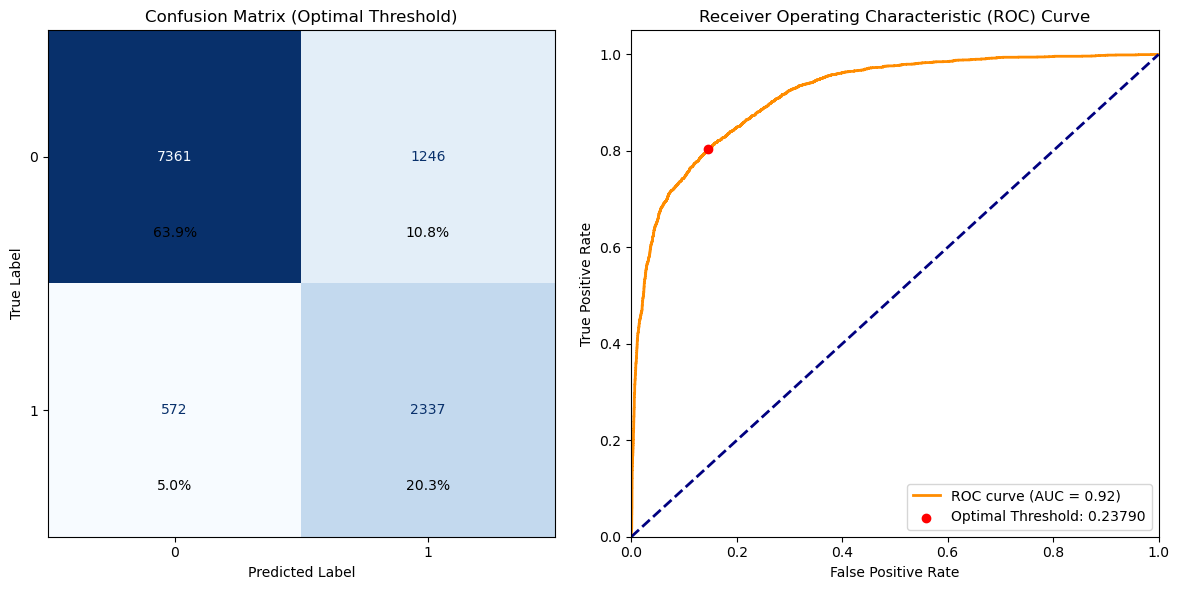

In [236]:
rf_2_3_scores = compute_metrics(rf_model_2_3, X_train, y_train, X_test, y_test, scorer=scorer, model_name="Random Forest 2.3")

In [237]:
results2 = pd.concat([results2, rf_2_3_scores], axis=0)

In [238]:
results2

,Model,Train_CV,Accuracy,Precision,Recall,F1-Score,Best Threshold (J-statistic)
0,Logistic Regression1,Test,0.866443,0.771917,0.678823,0.722383,0.374071
0,Logistic Regression2,Test,0.848038,0.673659,0.772774,0.719821,0.208721
0,Random Forest 1,Test,0.837704,0.641458,0.810588,0.716173,0.218860
0,Random Forest 2.1,Test,0.837704,0.641074,0.812307,0.716603,0.233006
0,Random Forest 2.2,Test,0.847343,0.667540,0.788243,0.722888,0.442431
0,Random Forest 2.3,Test,0.842133,0.652247,0.803369,0.719963,0.237898


We see that the performance of all three models look similar. The AUC stays around 0.92.

For our last Model we want to have a look at the Feature Importance. This will help us for setting an appropriate number of `max_features` for the BayesSearchCV:

/var/folders/yg/_yglls0s5958b_wpb6zlpk8h0000gn/T/ipykernel_40814/4054316024.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="imp", y="names", data=imp.head(25), ax=ax1, palette="viridis")
/var/folders/yg/_yglls0s5958b_wpb6zlpk8h0000gn/T/ipykernel_40814/4054316024.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="imp", y="names", data=imp.tail(25), ax=ax2, palette="coolwarm")


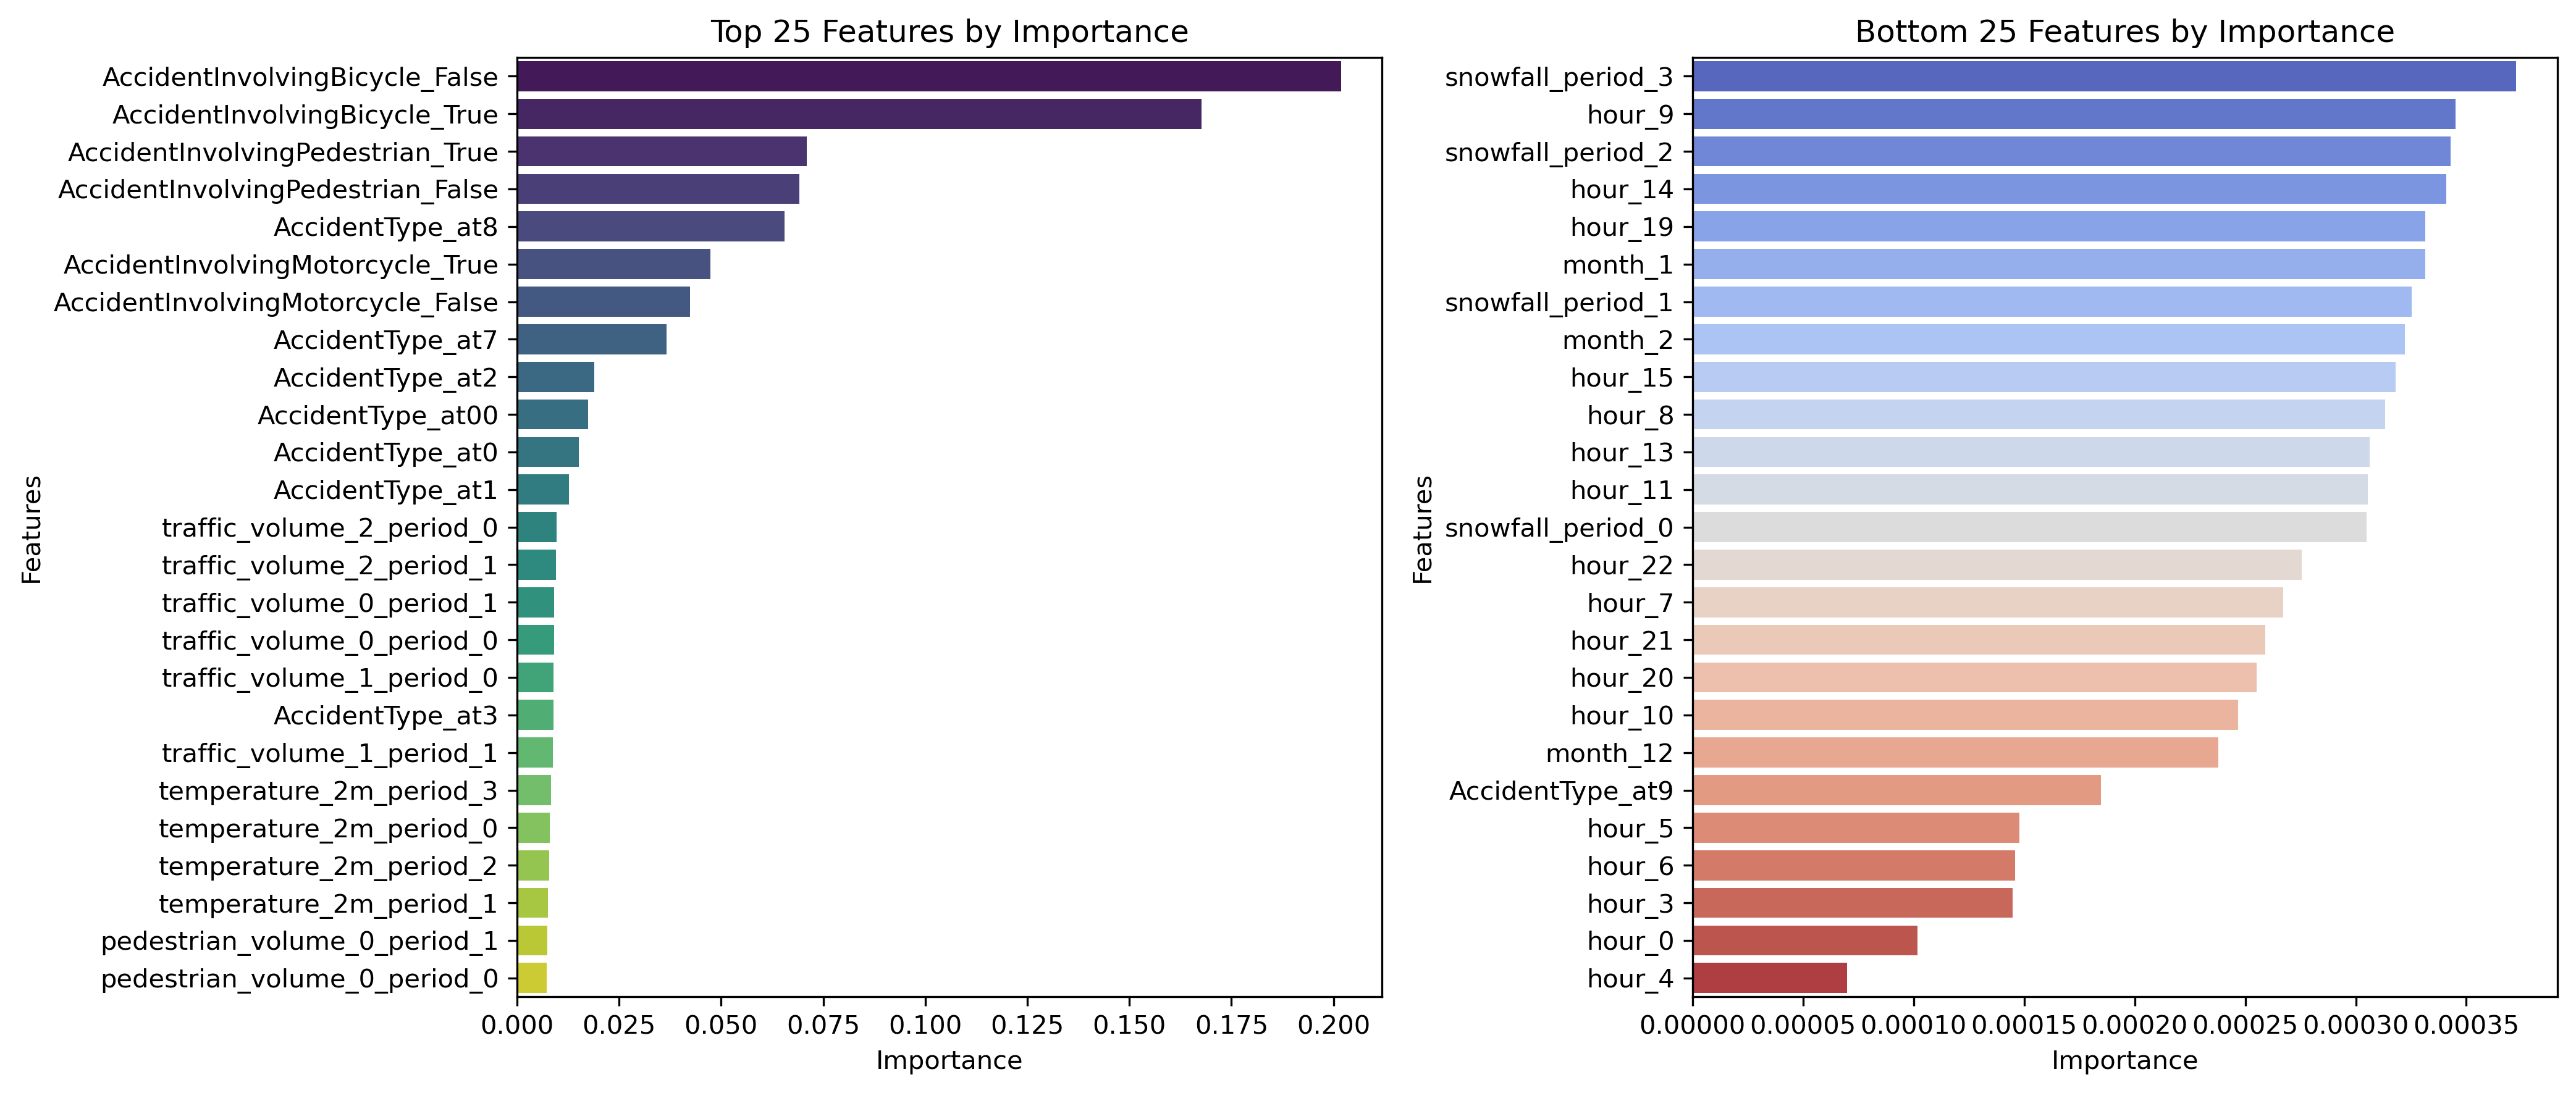

In [ ]:
# function to analyse feature importance
def plot_variable_importance(model, X_train):
    # calculate the feature importance
    imp = DataFrame({"imp": model.feature_importances_, "names": X_train.columns}).sort_values("imp", ascending=False)
    
    # creating the subplots: 2 subplots (left: 25 most important features, right: 25 least important)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), dpi=300)
    
    # plot for the 25 most important features (left side)
    sns.barplot(x="imp", y="names", data=imp.head(25), ax=ax1, palette="viridis")
    ax1.set_title("Top 25 Features by Importance")
    ax1.set_xlabel('Importance')
    ax1.set_ylabel('Features')

    # plot for the 25 least important features (right side)
    sns.barplot(x="imp", y="names", data=imp.tail(25), ax=ax2, palette="coolwarm")
    ax2.set_title("Bottom 25 Features by Importance")
    ax2.set_xlabel('Importance')
    ax2.set_ylabel('Features')

    # adjust layout and display the plots
    plt.tight_layout()
    plt.show()

# used on rf_model_2_3
plot_variable_importance(rf_model_2_3, X_train)


We see that we have a large number of not "very" important Features. This indicates, that a low number of the Hyperparameter `max_features` would be more appropriate. The reason is: If many of our features have little significance for the model, it may be useful to reduce the `max_features` value so that the RandomForestClassifier uses fewer unnecessary features in each tree. This leads to better model complexity and can reduce computing power and overfitting.

As we have around 99 Features, the hyperparameter set to 'sqrt' would mean, that we take $\sqrt{99} \approx 10$ features for each tree. The hyperparameter set to $\log_2 (99) \approx 7$.

With the additional hyperparametervalues 0.12 to 0.2 ($=0.12 * 99 \approx 12$ to $0.2 * 99 \approx 20$) ...we have a nice range for the hyperparameter `max_features`.


## 2.3 Finetuning with BayesSearchCV

For the BayesSearchCV we now want to define based on the hyperparamters from the RandomizedSearchCV an appropriate range for the BayesSearchCV.

The following Hyperparameters have been found so far:

|Method RandomizedSearchCV|bootstrap|class_weight|max_depth|max_features|min_samples_leaf|min_samples_split|n_estimators
|--|--|--|--|--|--|--|--|
|RSCV 1|True|None|15|0.2|6|3|574
|RSCV 2.1|True|balanced|15|0.2|7|3|893
|RSCV 2.2|True|None|15|0.2|3|6|490
|RSCV 2.3|False|None|15|sqrt|4|9|792

Considering these Hyperparamters we should include the following ranges in the hyperparamter grid for the BayesSearchCV:
|Method|bootstrap|class_weight|max_depth|max_features|min_samples_leaf|min_samples_split|n_estimators
|--|--|--|--|--|--|--|--|
|BayesSearchCV|True,False|balanced,None|around 15|sqrt, 0.2|[4,7]|[3,9]|[490,893]

/var/folders/yg/_yglls0s5958b_wpb6zlpk8h0000gn/T/ipykernel_40814/1456291907.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['max_features'] = df['max_features'].replace({'sqrt': -1})  # -1 steht für "sqrt" als Platzhalter


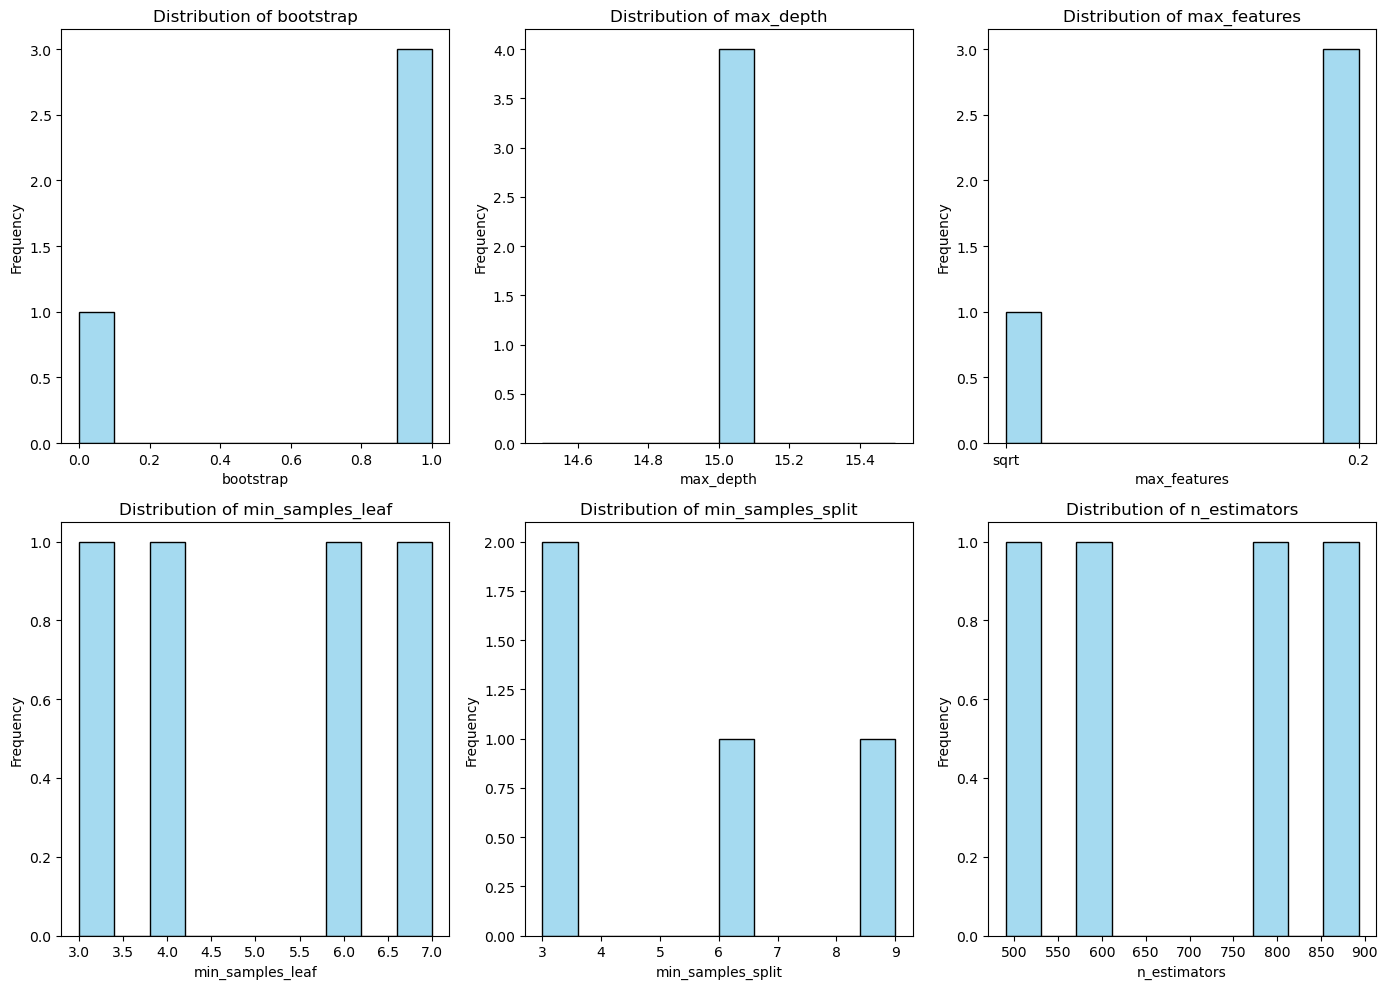

In [ ]:
# Hyperparameters from all RandomizedSearchCV-results
random_search_results = [
    {'bootstrap': False, 'class_weight': None, 'max_depth': 15, 'max_features': 'sqrt', 
     'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 792},
    {'bootstrap': True, 'class_weight': None, 'max_depth': 15, 'max_features': 0.2, 
     'min_samples_leaf': 6, 'min_samples_split': 3, 'n_estimators': 574},
    {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 15, 'max_features': 0.2, 
     'min_samples_leaf': 7, 'min_samples_split': 3, 'n_estimators': 893},
    {'bootstrap': True, 'class_weight': None, 'max_depth': 15, 'max_features': 0.2, 
     'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 490}
]

# tranformation of the results into a DataFrame
df = pd.DataFrame(random_search_results)

# transform the 'max_features' column: strings to consistent numerical values
df['max_features'] = df['max_features'].replace({'sqrt': -1})  # -1 stands for "sqrt"

# recode numerical values for 'bootstrap' and 'class_weight'
df['bootstrap'] = df['bootstrap'].astype(int)  # False=0, True=1
df['class_weight'] = df['class_weight'].map({'None': 0, 'balanced': 1, None: 0})

# Hyperparameter for the Plots
numerical_hyperparameters = ['bootstrap', 'max_depth', 'max_features', 
                             'min_samples_leaf', 'min_samples_split', 'n_estimators']

# plot for histograms of the hyperparameters
plt.figure(figsize=(14, 10))
for i, param in enumerate(numerical_hyperparameters, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=param, bins=10, kde=False, color='skyblue')
    if param == 'max_features':
        plt.xticks(ticks=[-1, 0.2], labels=['sqrt', '0.2'])  # show categories
    plt.title(f"Distribution of {param}")
    plt.xlabel(param)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
# DO NOT RUN THIS CODE CELL AS IT TAKES MORE THAN 10 HOURS TO RUN!

# defining the parameter space for the Bayesian Optimization based on the above comments
param_space = {
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced'],
    'max_depth': (11, 18),  # around 15
    'max_features': ['sqrt', 'log2', 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2],  # Nur die gefundenen Werte
    'min_samples_leaf': (2, 8),  # 2 to 8
    'min_samples_split': (2, 9),  # 2 to 9
    'n_estimators': (450, 950),  # values between 450 and 950
}

# StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=74)

# build the model
forest_bs = RandomForestClassifier(random_state=42)

# BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=forest_bs,
    search_spaces=param_space,
    n_iter=100,  # number of iterations
    scoring='roc_auc',  # ROC-AUC as metric
    cv=cv, # StratifiedKFold as before
    n_jobs=1, # set to 1 because parallel processing with bayesian optimization can cause issues
    verbose=2, # show progress
    random_state=42 # for reproducibility
)

# Training
bayes_search.fit(X_train, y_train)

# results
print("Beste Hyperparameter aus BayesSearchCV:", bayes_search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=True, class_weight=balanced, max_depth=18, max_features=0.13, min_samples_leaf=6, min_samples_split=5, n_estimators=625; total time= 1.1min
[CV] END bootstrap=True, class_weight=balanced, max_depth=18, max_features=0.13, min_samples_leaf=6, min_samples_split=5, n_estimators=625; total time= 1.1min
[CV] END bootstrap=True, class_weight=balanced, max_depth=18, max_features=0.13, min_samples_leaf=6, min_samples_split=5, n_estimators=625; total time= 1.0min
[CV] END bootstrap=True, class_weight=balanced, max_depth=18, max_features=0.13, min_samples_leaf=6, min_samples_split=5, n_estimators=625; total time= 1.1min
[CV] END bootstrap=True, class_weight=balanced, max_depth=18, max_features=0.13, min_samples_leaf=6, min_samples_split=5, n_estimators=625; total time= 1.1min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bootstrap=False, class_weight=balanced, max_depth=13, max_features=0.2, min_sa

In [ ]:
# convert results into a dataframe
results_bs = pd.DataFrame(bayes_search.cv_results_)

# sort results by the mean test score
sorted_results = results_bs.sort_values(by='mean_test_score', ascending=False)

# take the top 3 results
top_3 = sorted_results.head(3)

# print these parameters and results
print("Beste 3 Hyperparameterkombinationen:")
for i, row in top_3.iterrows():
    print(f"Hyperparameter: {row['params']}")
    print(f"Mean Test Score: {row['mean_test_score']}")
    print()

Beste 3 Hyperparameterkombinationen:
Hyperparameter: OrderedDict({'bootstrap': False, 'class_weight': None, 'max_depth': 15, 'max_features': 0.13, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 450})
Mean Test Score: 0.9179054208318871

Hyperparameter: OrderedDict({'bootstrap': False, 'class_weight': None, 'max_depth': 13, 'max_features': 0.15, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 586})
Mean Test Score: 0.9178888943715519

Hyperparameter: OrderedDict({'bootstrap': False, 'class_weight': None, 'max_depth': 13, 'max_features': 0.15, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 904})
Mean Test Score: 0.9178476679565906



We have found the following three hyperparameter-options with BayesSearchCV.

Best 3 Hyperparametercombinations:
1. Hyperparameter: OrderedDict({'bootstrap': False, 'class_weight': None, 'max_depth': 15, 'max_features': 0.13, 'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 450})
Mean Test Score: 0.9179054208318871

2. Hyperparameter: OrderedDict({'bootstrap': False, 'class_weight': None, 'max_depth': 13, 'max_features': 0.15, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 586})
Mean Test Score: 0.9178888943715519

3. Hyperparameter: OrderedDict({'bootstrap': False, 'class_weight': None, 'max_depth': 13, 'max_features': 0.15, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 904})
Mean Test Score: 0.9178476679565906

**Interpretation of the results:**
+ All three combinations use `bootstrap`=False and `class_weight`=None. This indicates that bootstrapping is not advantageous in this case and that the class distribution is sufficiently balanced so that no weighting of the classes is required (which seems to be a little strange)
+ All combinations use values for `max_features` that are relatively low (0.13 to 0.15). This suggests that limiting the maximum number of features considered per tree improves performance. This is particularly useful for high-dimensional datasets with many dummy variables, which we have already discussed.
+ The parameter `max_depth` varies between 13 and 15. These values indicate that the trees have a moderate depth, which avoids overfitting and still allows sufficiently complex patterns to be learnt.
+ The values for `min_samples_leaf` (5 to 8) and `min_samples_split` (2 to 5) are in the lower range, which indicates that smaller minimum numbers of samples per leaf and split lead to better results. The model therefore benefits from a flexible structure for the split criteria.
+ The number of trees (`n_estimators`) varies between 450 and 904. There is no clear preference for an exact number of trees as long as a sufficient number is used.

So let's set up these three models and calculate their score on the Test-Data.

In [239]:
# best Hyperparameters from BayesSearchCV
best_params31 = {
    'bootstrap': False,
    'class_weight': None,
    'max_depth': 15,
    'max_features': 0.13,
    'min_samples_leaf': 8,
    'min_samples_split': 3,
    'n_estimators': 450
}

# Define Random-Forest-Model with the best Hyperparameters
rf_model_3_1 = RandomForestClassifier(
    random_state=42,  # Same random state for reproducibility
    **best_params31  # Add the best hyperparameters
)

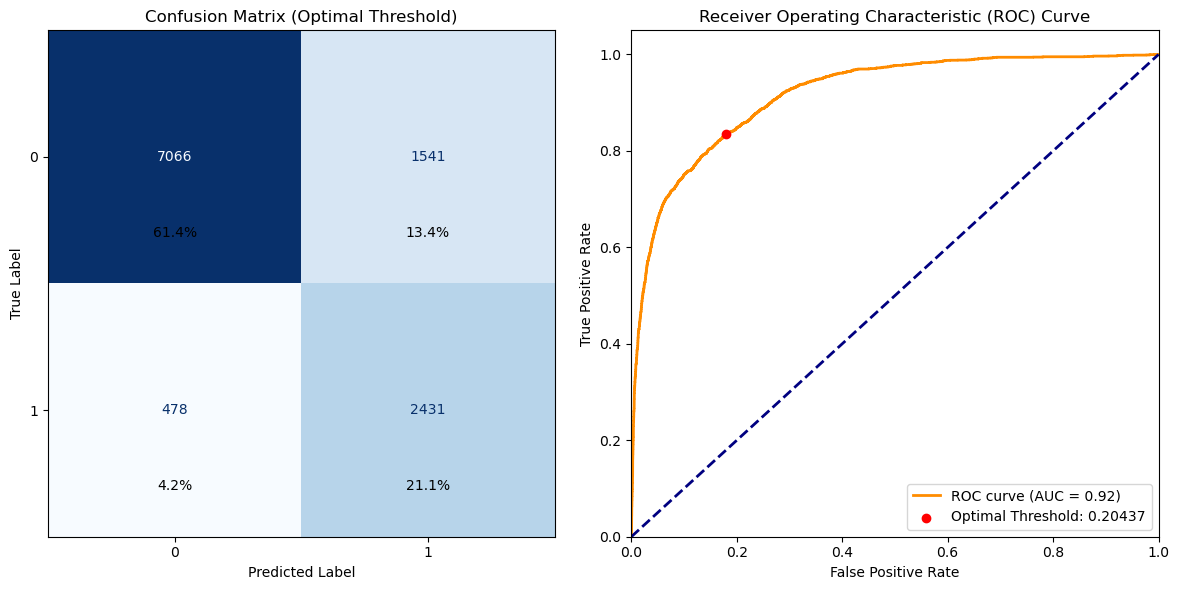

In [240]:
rf_3_1_scores = compute_metrics(rf_model_3_1, X_train, y_train, X_test, y_test, scorer=scorer, model_name="Random Forest 3.1 (BayesSearchCV)")

In [241]:
results2 = pd.concat([results2, rf_3_1_scores], axis=0)

In [242]:
results2

,Model,Train_CV,Accuracy,Precision,Recall,F1-Score,Best Threshold (J-statistic)
0,Logistic Regression1,Test,0.866443,0.771917,0.678823,0.722383,0.374071
0,Logistic Regression2,Test,0.848038,0.673659,0.772774,0.719821,0.208721
0,Random Forest 1,Test,0.837704,0.641458,0.810588,0.716173,0.218860
0,Random Forest 2.1,Test,0.837704,0.641074,0.812307,0.716603,0.233006
0,Random Forest 2.2,Test,0.847343,0.667540,0.788243,0.722888,0.442431
0,Random Forest 2.3,Test,0.842133,0.652247,0.803369,0.719963,0.237898
0,Random Forest 3.1 (BayesSearchCV),Test,0.824679,0.612034,0.835682,0.706583,0.204372


In [243]:
# second best Hyperparameters from BayesSearchCV
best_params32 = {
    'bootstrap': False,
    'class_weight': None,
    'max_depth': 13,
    'max_features': 0.15,
    'min_samples_leaf': 7,
    'min_samples_split': 2,
    'n_estimators': 586
}

# Define Random-Forest-Model with the second best Hyperparameters
rf_model_3_2 = RandomForestClassifier(
    random_state=42,  # Same random state for reproducibility
    **best_params32  # Add the best hyperparameters
)

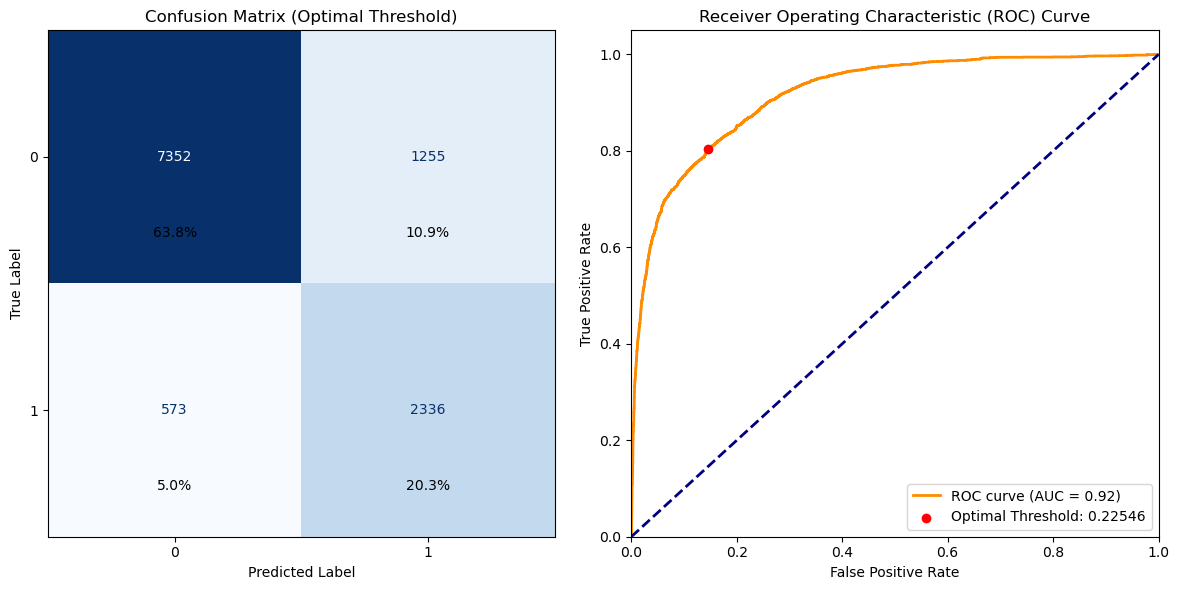

In [244]:
rf_3_2_scores = compute_metrics(rf_model_3_2, X_train, y_train, X_test, y_test, scorer=scorer, model_name="Random Forest 3.2 (BayesSearchCV)")

In [245]:
results2 = pd.concat([results2, rf_3_2_scores], axis=0)

In [246]:
results2

,Model,Train_CV,Accuracy,Precision,Recall,F1-Score,Best Threshold (J-statistic)
0,Logistic Regression1,Test,0.866443,0.771917,0.678823,0.722383,0.374071
0,Logistic Regression2,Test,0.848038,0.673659,0.772774,0.719821,0.208721
0,Random Forest 1,Test,0.837704,0.641458,0.810588,0.716173,0.218860
0,Random Forest 2.1,Test,0.837704,0.641074,0.812307,0.716603,0.233006
0,Random Forest 2.2,Test,0.847343,0.667540,0.788243,0.722888,0.442431
0,Random Forest 2.3,Test,0.842133,0.652247,0.803369,0.719963,0.237898
0,Random Forest 3.1 (BayesSearchCV),Test,0.824679,0.612034,0.835682,0.706583,0.204372
0,Random Forest 3.2 (BayesSearchCV),Test,0.841264,0.650515,0.803025,0.718769,0.225456


In [ ]:
# third best Hyperparameters from BayesSearchCV
best_params33 = {
    'bootstrap': False,
    'class_weight': None,
    'max_depth': 13,
    'max_features': 0.15,
    'min_samples_leaf': 5,
    'min_samples_split': 5,
    'n_estimators': 904
}

# Define Random-Forest-Model with the third best Hyperparameters
rf_model_3_3 = RandomForestClassifier(
    random_state=42,  # Same random state for reproducibility
    **best_params33  # Add the best hyperparameters
)

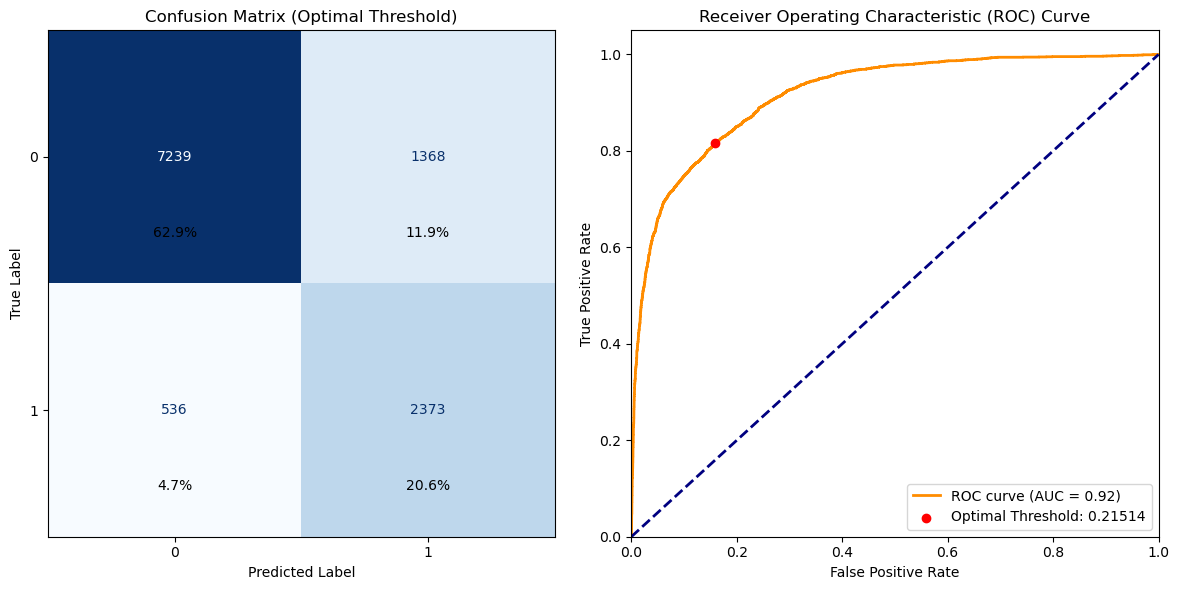

In [248]:
rf_3_3_scores = compute_metrics(rf_model_3_3, X_train, y_train, X_test, y_test, scorer=scorer, model_name="Random Forest 3.3 (BayesSearchCV)")

In [249]:
results2 = pd.concat([results2, rf_3_3_scores], axis=0)

In [250]:
results2

,Model,Train_CV,Accuracy,Precision,Recall,F1-Score,Best Threshold (J-statistic)
0,Logistic Regression1,Test,0.866443,0.771917,0.678823,0.722383,0.374071
0,Logistic Regression2,Test,0.848038,0.673659,0.772774,0.719821,0.208721
0,Random Forest 1,Test,0.837704,0.641458,0.810588,0.716173,0.218860
0,Random Forest 2.1,Test,0.837704,0.641074,0.812307,0.716603,0.233006
0,Random Forest 2.2,Test,0.847343,0.667540,0.788243,0.722888,0.442431
0,Random Forest 2.3,Test,0.842133,0.652247,0.803369,0.719963,0.237898
0,Random Forest 3.1 (BayesSearchCV),Test,0.824679,0.612034,0.835682,0.706583,0.204372
0,Random Forest 3.2 (BayesSearchCV),Test,0.841264,0.650515,0.803025,0.718769,0.225456
0,Random Forest 3.3 (BayesSearchCV),Test,0.834665,0.634322,0.815744,0.713684,0.215135


As `class_weight` has been set to "None" and that seems strange for our imbalanced Dataset, we still want to calculate the score of the best model from BayesSearchCV but this time setting this hyperparameter to "balanced".

In [ ]:
# best Hyperparameters from BayesSearchCV with class_weight='balanced'
best_params34 = {
    'bootstrap': False,
    'class_weight': 'balanced',
    'max_depth': 15,
    'max_features': 0.13,
    'min_samples_leaf': 8,
    'min_samples_split': 3,
    'n_estimators': 450
}

# Define Random-Forest-Model with above Hyperparameters
rf_model_3_4 = RandomForestClassifier(
    random_state=42,  # Same random state for reproducibility
    **best_params34  # Add the best hyperparameters
)

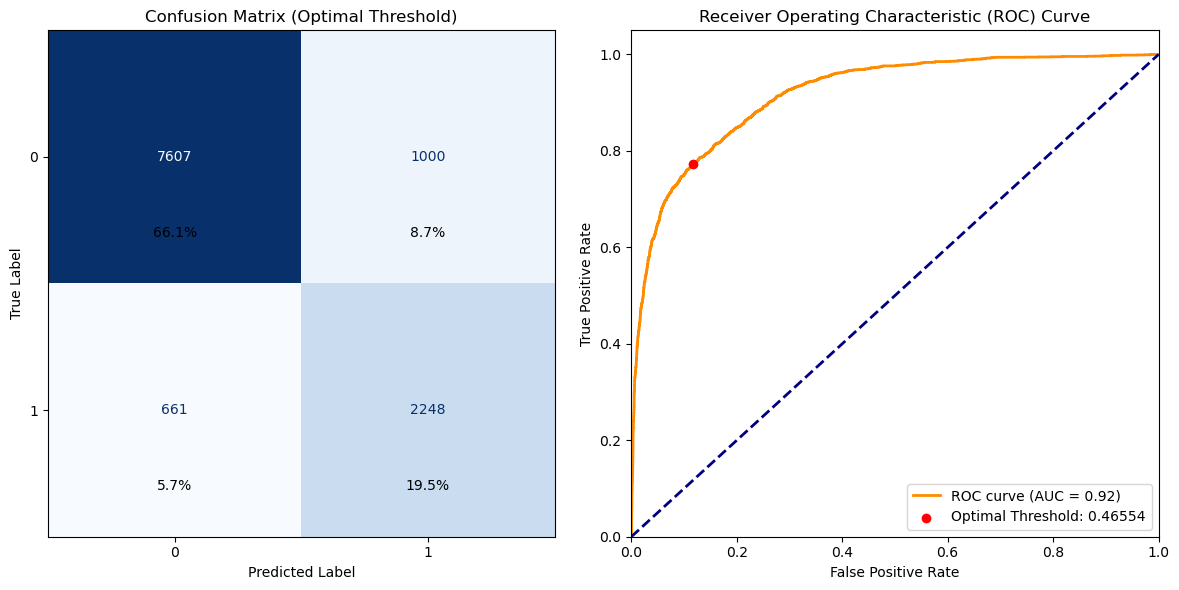

In [252]:
rf_3_4_scores = compute_metrics(rf_model_3_4, X_train, y_train, X_test, y_test, scorer=scorer, model_name="Random Forest 3.4 (BayesSearchCV class_weight='balanced')")

In [253]:
results2 = pd.concat([results2, rf_3_4_scores], axis=0)

In [254]:
results2

,Model,Train_CV,Accuracy,Precision,Recall,F1-Score,Best Threshold (J-statistic)
0,Logistic Regression1,Test,0.866443,0.771917,0.678823,0.722383,0.374071
0,Logistic Regression2,Test,0.848038,0.673659,0.772774,0.719821,0.208721
0,Random Forest 1,Test,0.837704,0.641458,0.810588,0.716173,0.218860
0,Random Forest 2.1,Test,0.837704,0.641074,0.812307,0.716603,0.233006
0,Random Forest 2.2,Test,0.847343,0.667540,0.788243,0.722888,0.442431
0,Random Forest 2.3,Test,0.842133,0.652247,0.803369,0.719963,0.237898
0,Random Forest 3.1 (BayesSearchCV),Test,0.824679,0.612034,0.835682,0.706583,0.204372
0,Random Forest 3.2 (BayesSearchCV),Test,0.841264,0.650515,0.803025,0.718769,0.225456
0,Random Forest 3.3 (BayesSearchCV),Test,0.834665,0.634322,0.815744,0.713684,0.215135
0,Random Forest 3.4 (BayesSearchCV class_weight=...,Test,0.855766,0.692118,0.772774,0.730226,0.465542


We can conclude that the parameters of the best combination of BayesSearchCV (450 trees, max_features=0.13, etc.) offer the highest efficiency with minimum resource consumption.

In [ ]:
# Optional - Save the results to a CSV file

file_path = "/Users/elocher/Computer_Science/FCS_Group/Data_for_modeling/"

results2.to_csv(file_path + "results2.csv", index=False)  # save without index

# 3. XGBoost (Gradient Boosting)

**XGBoost** is a powerful boosting method that uses sequential modelling of decision trees. The trees are built in such a way that they correct the errors of the previous trees, resulting in better overall performance. XGBoost is known for its high performance, especially with large data sets and complex models. The **Gradient Boosting** method has proven to be very efficient for classification with imbalanced data sets. It offer robust performance, is able to learn complex patterns and provides strong regularisation mechanisms.

**Advantages:**
+ High accuracy: XGBoost often achieves very good results and is one of the leading algorithms in many machine learning competitions.
+ Flexibility: It offers a variety of hyperparameters that can be used to fine-tune the model, and it can model both linear and non-linear relationships well.
+ Efficient with unbalanced data sets: XGBoost has a built-in way to account for class imbalance (e.g., through the scale_pos_weight parameter).

**Disadvantages:**
+ Complexity: The model has many hyperparameters that need to be carefully tuned, which makes it more complex compared to simpler models such as logistic regression.
+ Computational complexity: It is resource intensive, especially with large data sets and many hyperparameters.
+ Interpretability: As with the Random Forest, XGBoost is less interpretable as it is based on a large number of decision trees.

## 3.1 Approach with RandomizedSearchCV

*Note:* The codecell bellow has been executed on Google Colab as we can use their machines (GPU available). The results from the RandomizedSearchCV are shown bellow in a markdown cell.

In [ ]:
# Define hyperparameters for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(400, 1000),  # random values between 400 and 1000
    'max_depth': [3, 5, 7, 10, 12, 15],  # maximal depth of the trees
    'learning_rate': uniform(0.01, 0.3),  # learning rate (0.01 to 0.3)
    'subsample': uniform(0.6, 0.4),  # part of training data, used for training (0.6 bis 1.0)
    'colsample_bytree': uniform(0.6, 0.4),  # part of features for each tree training
    'min_child_weight': randint(1, 10),  # minimal number of instances in a leaf
    'gamma': uniform(0, 0.5),  # Minimum Reduction in the loss-function for split
    'scale_pos_weight': [1, 2, 5, 10, 20],  # weighting of the positive class (for unbalanced dataset)
    'reg_alpha': uniform(0, 1),  # L1 Regularization
    'reg_lambda': uniform(0, 1),  # L2 Regularization
    'booster': ['gbtree', 'gblinear', 'dart']  # Der Boosting-Algorithmus (tree-based)
}

# define Basismodel
xgb_model = xgb.XGBClassifier(random_state=42)

# StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# create RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb_model,
                                       param_distributions=param_dist,
                                       n_iter=70,  # number of random configuration that will be tested
                                       cv=cv,  # StratifiedKFold as before
                                       scoring='roc_auc',  # ROC-AUC as metric
                                       n_jobs=2,  # set to -1 for using all available cores
                                       random_state=42,  # reproducibility
                                       verbose=2,  # show progress
                                       )

# fit RandomizedSearchCV on train data
random_search_xgb.fit(X_train, y_train)

# print best parameters
print("Beste Parameter aus RandomizedSearchCV:", random_search_xgb.best_params_)

Best Parameters from RandomizedSearchCV: {'booster': 'gbtree', 'colsample_bytree': 0.8803345035229626, 'gamma': 0.1416145155592091, 'learning_rate': 0.014116898859160489, 'max_depth': 5, 'min_child_weight': 8, 'n_estimators': 750, 'reg_alpha': 0.00023362975230429848, 'reg_lambda': 0.29766346778736524, 'scale_pos_weight': 1, 'subsample': 0.7912726728878613}
 
 
Second best Parameters: {'booster': 'gbtree', 'colsample_bytree': 0.9940994751148137, 'gamma': 0.015069251201225643, 'learning_rate': 0.07113940385743638, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 550, 'reg_alpha': 0.16704037873750505, 'reg_lambda': 0.2808464322482343, 'scale_pos_weight': 2, 'subsample': 0.9790050504432495}
 
 
Third best Parameters: {'booster': 'gbtree', 'colsample_bytree': 0.9075685593078079, 'gamma': 0.13039225190052012, 'learning_rate': 0.054853861892111964, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 500, 'reg_alpha': 0.14816811455503037, 'reg_lambda': 0.05364681276639864, 'scale_pos_weight': 5, 'subsample': 0.8972838676901029}

Summarized in a table:

|Method|booster|colsample_bytree|gamma|learning_rate|max_depth|min_child_weight|n_estimators|reg_alpha|reg_lambda|sclae_pos_weight|subsample
|--|--|--|--|--|--|--|--|--|--|--|--|
|RSCV 1.1|gbtree|0.8803345035229626|0.1416145155592091|0.014116898859160489|5|8|750|0.00023362975230429848|0.29766346778736524|1|0.7912726728878613|
|RSCV 1.2|gbtree|0.9940994751148137|0.015069251201225643|0.07113940385743638|3|3|550|0.16704037873750505|0.2808464322482343|2|0.9790050504432495|
|RSCV 1.3|gbtree|0.9075685593078079|0.13039225190052012|0.054853861892111964|3|4|500|0.14816811455503037|0.05364681276639864|5|0.8972838676901029|
|Resulting range|gbtree|0.87-0.995|0.014-0.15|0.01-0.06|3-6|3-8|490-760|0.0002-0.18|0.05-0.3|1-5|0.78-0.985

Therefore we will define our ranges for the BayesSearchCV as followed:

```python
param_space = {
    'booster': ['gbtree'],  # Nur 'gbtree' ist sinnvoll
    'colsample_bytree': Real(0.87, 0.995, prior='uniform'),  # Bereich: 0.87 - 0.995
    'gamma': Real(0.014, 0.15, prior='uniform'),  # Bereich: 0.014 - 0.15
    'learning_rate': Real(0.01, 0.06, prior='uniform'),  # Bereich: 0.01 - 0.06
    'max_depth': Integer(3, 6),  # Bereich: 3 - 6
    'min_child_weight': Integer(3, 8),  # Bereich: 3 - 8
    'n_estimators': Integer(490, 760),  # Bereich: 490 - 760
    'reg_alpha': Real(0.0002, 0.18, prior='uniform'),  # Bereich: 0.0002 - 0.18
    'reg_lambda': Real(0.05, 0.3, prior='uniform'),  # Bereich: 0.05 - 0.3
    'scale_pos_weight': Integer(1, 5),  # Bereich: 1 - 5
    'subsample': Real(0.78, 0.985, prior='uniform')  # Bereich: 0.78 - 0.985
}
```
But first let's calculate and plot the results from the RandomizedSearchCV:


In [256]:
# best Hyperparameters from RandomizedSearchCV
best_params41 = {
    'booster': 'gbtree',
    'colsample_bytree': 0.8803345035229626,
    'gamma': 0.1416145155592091,
    'learning_rate': 0.014116898859160489,
    'max_depth': 5,
    'min_child_weight': 8,
    'n_estimators': 750,
    'reg_alpha': 0.00023362975230429848,
    'reg_lambda': 0.29766346778736524,
    'scale_pos_weight': 1,
    'subsample': 0.7912726728878613
}

# Define XGBClassifier-Model with the best Hyperparameters
xgb_model_4_1 = xgb.XGBClassifier(
    random_state=42,  # Same random state for reproducibility
    **best_params41  # Add the best hyperparameters
)

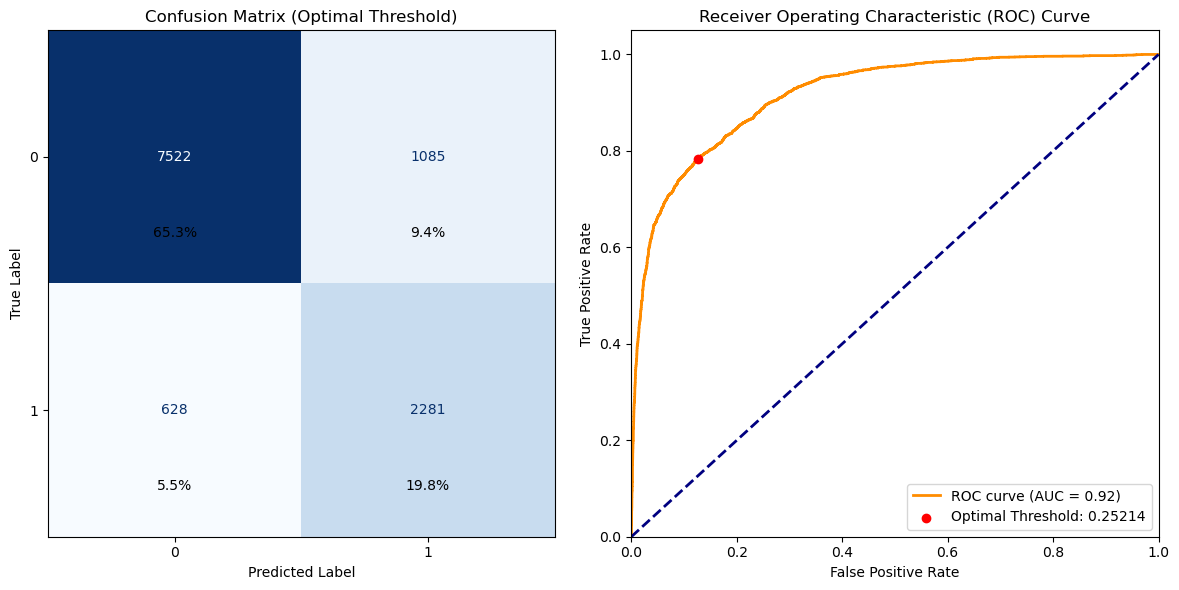

In [257]:
xgb_4_1_scores = compute_metrics(xgb_model_4_1, X_train, y_train, X_test, y_test, scorer=scorer, model_name="XGBClassifier 4.1 (RandomizedSearchCV)")

In [258]:
results2 = pd.concat([results2, xgb_4_1_scores], axis=0)

In [259]:
# second best Hyperparameters from RandomizedSearchCV
best_params42 = {
    'booster': 'gbtree',
    'colsample_bytree': 0.9940994751148137,
    'gamma': 0.015069251201225643,
    'learning_rate': 0.07113940385743638,
    'max_depth': 3,
    'min_child_weight': 3,
    'n_estimators': 550,
    'reg_alpha': 0.16704037873750505,
    'reg_lambda': 0.2808464322482343,
    'scale_pos_weight': 2,
    'subsample': 0.9790050504432495
}

# Define XGBClassifier-Model with the second best Hyperparameters
xgb_model_4_2 = xgb.XGBClassifier(
    random_state=42,  # Same random state for reproducibility
    **best_params42  # Add the best hyperparameters
)

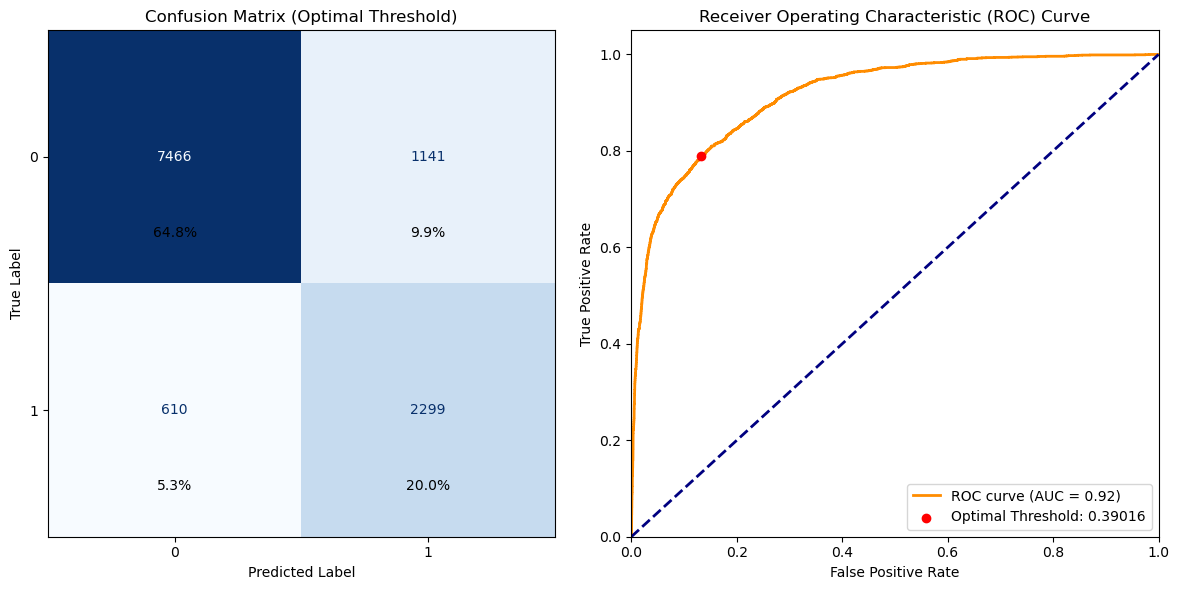

In [260]:
xgb_4_2_scores = compute_metrics(xgb_model_4_2, X_train, y_train, X_test, y_test, scorer=scorer, model_name="XGBClassifier 4.2 (RandomizedSearchCV)")

In [261]:
results2 = pd.concat([results2, xgb_4_2_scores], axis=0)

In [262]:
# third best Hyperparameters from RandomizedSearchCV
best_params43 = {
    'booster': 'gbtree',
    'colsample_bytree': 0.9075685593078079,
    'gamma': 0.13039225190052012,
    'learning_rate': 0.054853861892111964,
    'max_depth': 3,
    'min_child_weight': 4,
    'n_estimators': 500,
    'reg_alpha': 0.14816811455503037,
    'reg_lambda': 0.05364681276639864,
    'scale_pos_weight': 5,
    'subsample': 0.8972838676901029  
}

# Define XGBClassifier-Model with the third best Hyperparameters
xgb_model_4_3 = xgb.XGBClassifier(
    random_state=42,  # Same random state for reproducibility
    **best_params43  # Add the best hyperparameters
)

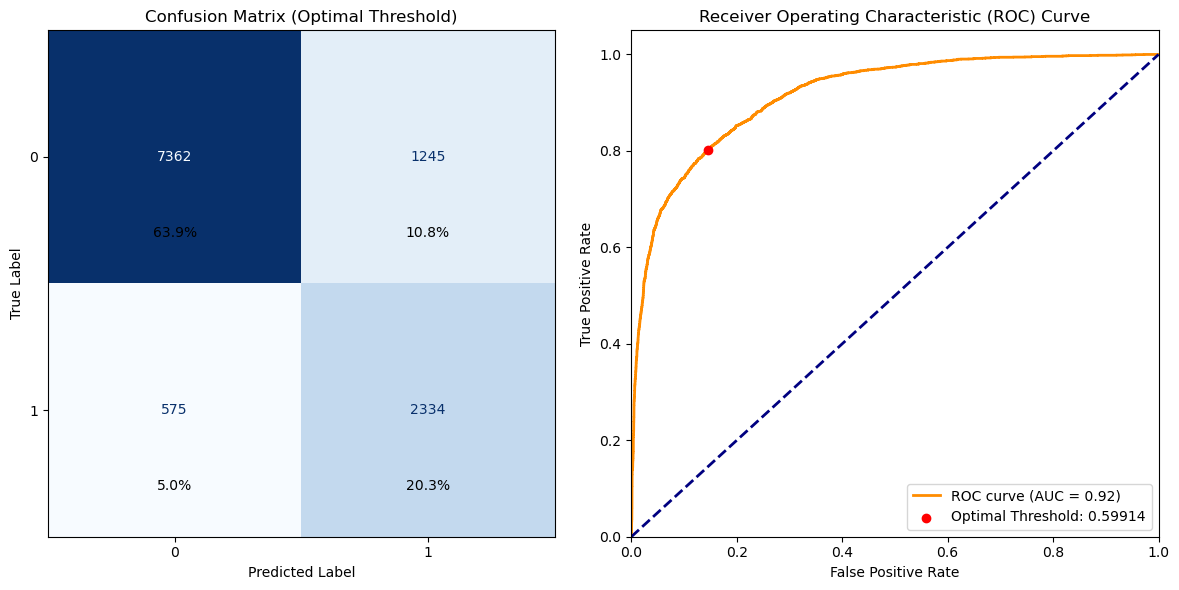

In [263]:
xgb_4_3_scores = compute_metrics(xgb_model_4_3, X_train, y_train, X_test, y_test, scorer=scorer, model_name="XGBClassifier 4.3 (RandomizedSearchCV)")

In [264]:
results2 = pd.concat([results2, xgb_4_3_scores], axis=0)

In [265]:
results2

,Model,Train_CV,Accuracy,Precision,Recall,F1-Score,Best Threshold (J-statistic)
0,Logistic Regression1,Test,0.866443,0.771917,0.678823,0.722383,0.374071
0,Logistic Regression2,Test,0.848038,0.673659,0.772774,0.719821,0.208721
0,Random Forest 1,Test,0.837704,0.641458,0.810588,0.716173,0.218860
0,Random Forest 2.1,Test,0.837704,0.641074,0.812307,0.716603,0.233006
0,Random Forest 2.2,Test,0.847343,0.667540,0.788243,0.722888,0.442431
0,Random Forest 2.3,Test,0.842133,0.652247,0.803369,0.719963,0.237898
0,Random Forest 3.1 (BayesSearchCV),Test,0.824679,0.612034,0.835682,0.706583,0.204372
0,Random Forest 3.2 (BayesSearchCV),Test,0.841264,0.650515,0.803025,0.718769,0.225456
0,Random Forest 3.3 (BayesSearchCV),Test,0.834665,0.634322,0.815744,0.713684,0.215135
0,Random Forest 3.4 (BayesSearchCV class_weight=...,Test,0.855766,0.692118,0.772774,0.730226,0.465542


## 3.2 Finetuning with BayesSearchCV

Now let's use the **BayesSearchCV** to finetune our XGBClassifier Model:

In [ ]:
# parameter space for BayesSearchCV
param_space = {
    'booster': ['gbtree'],  # only 'gbtree' is used
    'colsample_bytree': Real(0.87, 0.995, prior='uniform'),  # range: 0.87 - 0.995
    'gamma': Real(0.014, 0.15, prior='uniform'),  # range: 0.014 - 0.15
    'learning_rate': Real(0.01, 0.06, prior='uniform'),  # range: 0.01 - 0.06
    'max_depth': Integer(3, 6),  # range: 3 - 6
    'min_child_weight': Integer(3, 8),  # range: 3 - 8
    'n_estimators': Integer(490, 760),  # range: 490 - 760
    'reg_alpha': Real(0.0002, 0.18, prior='uniform'),  # reange: 0.0002 - 0.18
    'reg_lambda': Real(0.05, 0.3, prior='uniform'),  # range: 0.05 - 0.3
    'scale_pos_weight': Integer(1, 5),  # range: 1 - 5
    'subsample': Real(0.78, 0.985, prior='uniform')  # range: 0.78 - 0.985
}

# define Basismodel
xgb_model = xgb.XGBClassifier(random_state=42)

# StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# create BayesSearchCV
bayes_search_xgb = BayesSearchCV(estimator=xgb_model,
                                search_spaces=param_space,
                                n_iter=100,  # number of random configuration that will be tested
                                cv=cv,  # StratifiedKFold as before
                                scoring='roc_auc',  # ROC-AUC as metric
                                n_jobs=1,  # set to 1 because parallel processing with bayesian optimization can cause issues
                                random_state=42,  # reproducibility
                                verbose=2,  # show progress
                                )

# fit BayesSearchCV on Train data
bayes_search_xgb.fit(X_train, y_train)

# print best parameters
print("Beste Parameter aus BayesSearchCV:", bayes_search_xgb.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END booster=gbtree, colsample_bytree=0.9609657178971657, gamma=0.1408700478433054, learning_rate=0.025789979674352433, max_depth=5, min_child_weight=5, n_estimators=585, reg_alpha=0.13316286130743762, reg_lambda=0.12611582775912655, scale_pos_weight=4, subsample=0.8927426080710057; total time=   4.0s
[CV] END booster=gbtree, colsample_bytree=0.9609657178971657, gamma=0.1408700478433054, learning_rate=0.025789979674352433, max_depth=5, min_child_weight=5, n_estimators=585, reg_alpha=0.13316286130743762, reg_lambda=0.12611582775912655, scale_pos_weight=4, subsample=0.8927426080710057; total time=   3.3s
[CV] END booster=gbtree, colsample_bytree=0.9609657178971657, gamma=0.1408700478433054, learning_rate=0.025789979674352433, max_depth=5, min_child_weight=5, n_estimators=585, reg_alpha=0.13316286130743762, reg_lambda=0.12611582775912655, scale_pos_weight=4, subsample=0.8927426080710057; total time=   3.7s
[CV] END booster=gbt

Beste Parameter aus BayesSearchCV: OrderedDict({'booster': 'gbtree', 'colsample_bytree': 0.87, 'gamma': 0.15, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 8, 'n_estimators': 760, 'reg_alpha': 0.0002, 'reg_lambda': 0.05, 'scale_pos_weight': 1, 'subsample': 0.78})

In [ ]:
# best Hyperparameters from BayesSearchCV
best_params44 = {
    'booster': 'gbtree',
    'colsample_bytree': 0.87,
    'gamma': 0.15,
    'learning_rate': 0.01,
    'max_depth': 6,
    'min_child_weight': 8,
    'n_estimators': 760,
    'reg_alpha': 0.0002,
    'reg_lambda': 0.05,
    'scale_pos_weight': 1,
    'subsample': 0.78
}

# Define XGBClassifier-Model with the best Hyperparameters
xgb_model_4_4 = xgb.XGBClassifier(
    random_state=42,  # Same random state for reproducibility
    **best_params44  # Add the best hyperparameters
)

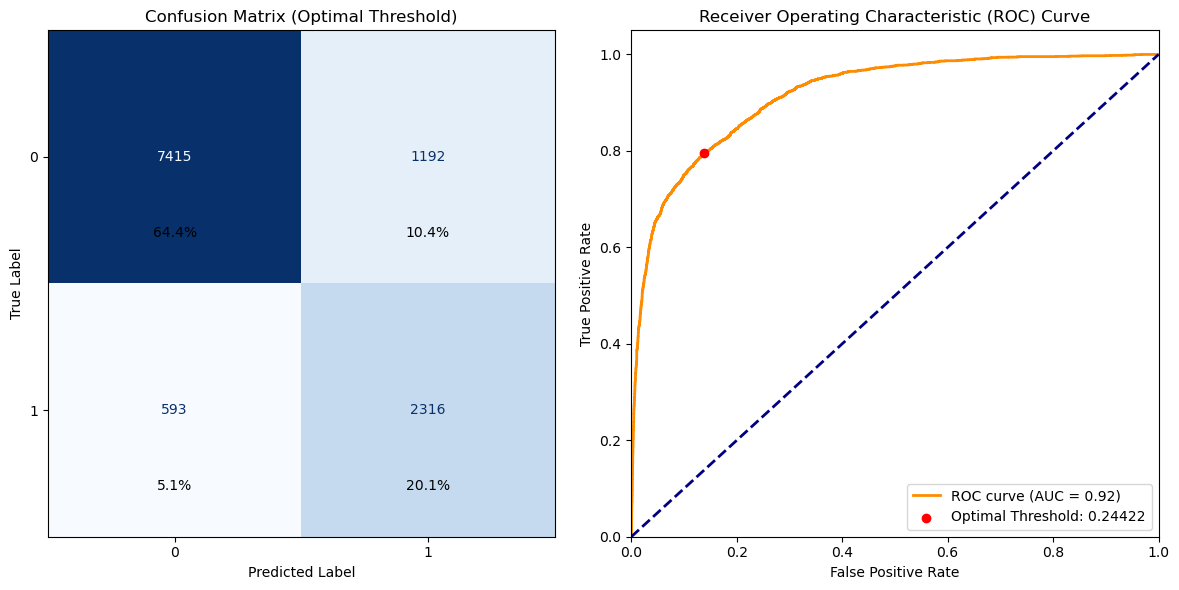

In [267]:
xgb_4_4_scores = compute_metrics(xgb_model_4_4, X_train, y_train, X_test, y_test, scorer=scorer, model_name="XGBClassifier 4.4 (BayesSearchCV)")

In [268]:
results2 = pd.concat([results2, xgb_4_4_scores], axis=0)

In [269]:
results2

,Model,Train_CV,Accuracy,Precision,Recall,F1-Score,Best Threshold (J-statistic)
0,Logistic Regression1,Test,0.866443,0.771917,0.678823,0.722383,0.374071
0,Logistic Regression2,Test,0.848038,0.673659,0.772774,0.719821,0.208721
0,Random Forest 1,Test,0.837704,0.641458,0.810588,0.716173,0.218860
0,Random Forest 2.1,Test,0.837704,0.641074,0.812307,0.716603,0.233006
0,Random Forest 2.2,Test,0.847343,0.667540,0.788243,0.722888,0.442431
0,Random Forest 2.3,Test,0.842133,0.652247,0.803369,0.719963,0.237898
0,Random Forest 3.1 (BayesSearchCV),Test,0.824679,0.612034,0.835682,0.706583,0.204372
0,Random Forest 3.2 (BayesSearchCV),Test,0.841264,0.650515,0.803025,0.718769,0.225456
0,Random Forest 3.3 (BayesSearchCV),Test,0.834665,0.634322,0.815744,0.713684,0.215135
0,Random Forest 3.4 (BayesSearchCV class_weight=...,Test,0.855766,0.692118,0.772774,0.730226,0.465542


In [ ]:
# Optional - Save the results to a CSV file

file_path = "/Users/elocher/Computer_Science/FCS_Group/Data_for_modeling/"

results2.to_csv(file_path + "results2_overall.csv", index=False)  # save without index

# 4. Decision for the best model

## 4.1 Overview of model performance

We first plot the ROC-curves for all models.

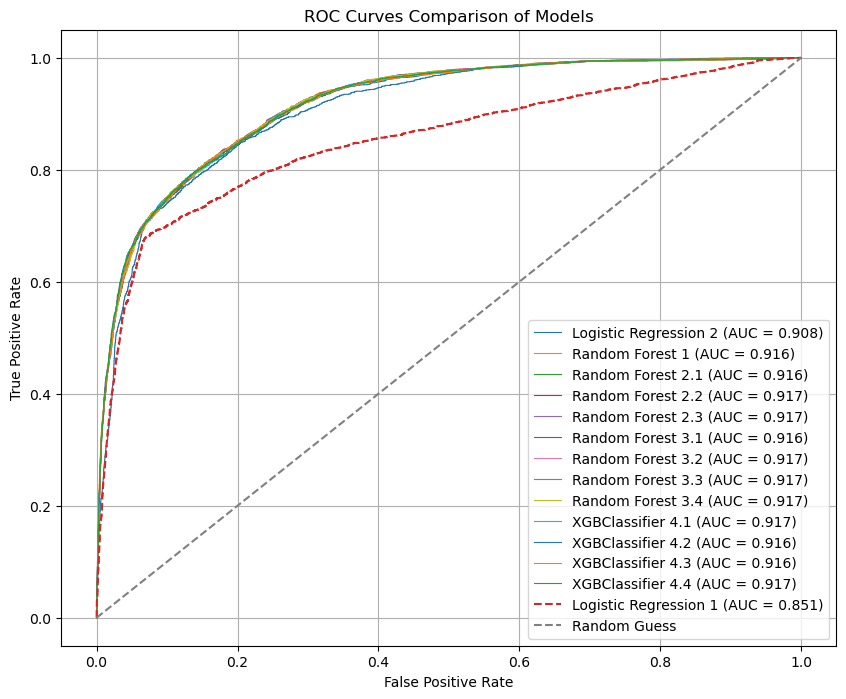

Random Forest 3.2: AUC = 0.9168
Random Forest 3.3: AUC = 0.9168
Random Forest 3.4: AUC = 0.9167
Random Forest 2.2: AUC = 0.9166
Random Forest 2.3: AUC = 0.9166
XGBClassifier 4.4: AUC = 0.9166
XGBClassifier 4.1: AUC = 0.9166
Random Forest 3.1: AUC = 0.9165
Random Forest 1: AUC = 0.9164
Random Forest 2.1: AUC = 0.9163
XGBClassifier 4.3: AUC = 0.9161
XGBClassifier 4.2: AUC = 0.9159
Logistic Regression 2: AUC = 0.9082
Logistic Regression (X_test1): AUC = 0.8510


In [ ]:
# models dictionary
models = {
    'Logistic Regression 2': log_reg2, 
    'Random Forest 1': rf_model_1, 
    'Random Forest 2.1': rf_model_2_1,
    'Random Forest 2.2': rf_model_2_2, 
    'Random Forest 2.3': rf_model_2_3, 
    'Random Forest 3.1': rf_model_3_1,
    'Random Forest 3.2': rf_model_3_2, 
    'Random Forest 3.3': rf_model_3_3, 
    'Random Forest 3.4': rf_model_3_4,
    'XGBClassifier 4.1': xgb_model_4_1, 
    'XGBClassifier 4.2': xgb_model_4_2, 
    'XGBClassifier 4.3': xgb_model_4_3,
    'XGBClassifier 4.4': xgb_model_4_4
}

# list to save model name and auc score
roc_results = []

# plot roc-curve
plt.figure(figsize=(10, 8))

# ROC-curve for model with X_test and y_test
for model_name, model in models.items():
    # probabilities for the positive class
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # calculate ROC-curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    # plot ROC-curve
    plt.plot(fpr, tpr, linewidth=0.8, label=f'{model_name} (AUC = {roc_auc:.3f})')
    
    # save auc score for each model
    roc_results.append((model_name, roc_auc))

# special case: log_reg1 with X_test1 and y_test1
y_proba_log_reg = log_reg.predict_proba(X_test1)[:, 1]
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test1, y_proba_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# plot roc-curve for log_reg
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression 1 (AUC = {roc_auc_log_reg:.3f})', linestyle='--')

# define plot settings
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.title('ROC Curves Comparison of Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# print AUC-results
roc_results.append(('Logistic Regression (X_test1)', roc_auc_log_reg))
roc_results.sort(key=lambda x: x[1], reverse=True)
for model_name, auc_value in roc_results:
    print(f'{model_name}: AUC = {auc_value:.4f}')


Overall the performance of the models don't variy much. But we can clearly see that with non-linear models (such as RandomForest oder XGBoost) we improved our auc_score from 0.908 to 0.917. The reason why we chose the auc_score is because it is not threshold-dependent.

In addition, we can say that revising the dataframe by adding more features has clearly paid off. With our simple dataframe, we achieved an AUC score of 0.85 with the first LogReg. With some hyperparameter tuning and the new features, we were able to increase the score to 0.917. This is a significant improvement!
Between the non-linear models, the performance is somewhat the same (between 0.916 to 0.917). This is why the model selection is not directly apparent from the graph. This could indicate that we might be able to find a better model with additional features, but that no better results can be achieved with the current dataframe. It is therefore worth taking a look at the hyperparameters of the different models. We have used many different hyperparameters, ranging from simpler to more complicated models. It therefore makes sense to choose a simpler model that performs slightly better than a more complex model.

## 4.2 Compare Hyperparameters of the best models

Let's compare the hyperparameters of the following models:
1. RF 3.2
2. RF 3.3
3. RF 3.4
4. XGB 4.4
5. XGB 4.1

*Note:* the models 3.2, 3.3, 3.4 and 4.4 are the best performing models from the specific model type. The hyperparameters of these models were found via BayesSearchCV. So we were actually able to use the BayesSearchCV method to fine-tune the hyperparameters so that the performance was slightly improved. This is good news, even if the improvement was only minimal.

**Comparison of Hyperparameters of RandomForests:**

| Hyperparameter       | **RF 3.2** | RF 3.3 | RF 3.4       |
|----------------------|--------|--------|--------------|
| bootstrap            | False  | False  | False        |
| class_weight         | None   | None   | balanced     |
| max_depth            | 13     | 13     | 15           |
| max_features         | 0.15   | 0.15   | 0.13         |
| min_samples_leaf     | 7      | 5      | 8            |
| min_samples_split    | 2      | 5      | 3            |
| n_estimators         | 586    | 904    | 450          |

Comments on complexity:
+ RF 3.2: Moderate, as min_samples_leaf is comparatively large, but min_samples_split is quite low.
+ RF 3.3: Higher than RF 3.2, as more trees (n_estimators) are used and min_samples_leaf is smaller.
+ RF 3.4: Least complex, as the number of trees is the lowest, min_samples_leaf is the largest, and max_features is the lowest, although the larger max_depth increases the complexity somewhat.

Conclusion: 
Although model 3.4 may appear to be the least complex, it should be noted that its AUC score is minimally lower. Therefore, **model 3.2** seems to represent a very good middle ground.

**Comparison of Hyperparameters of XGBClassifiers:**
| Hyperparameter    | **XGB 4.1** | XGB 4.4 |
|-------------------|---------|---------|
| booster           | gbtree  | gbtree  |
| colsample_bytree  | 0.8803  | 0.87    |
| gamma             | 0.1416  | 0.15    |
| learning_rate     | 0.0141  | 0.01    |
| max_depth         | 5       | 6       |
| min_child_weight  | 8       | 8       |
| n_estimators      | 750     | 760     |
| reg_alpha         | 0.0002  | 0.0002  |
| reg_lambda        | 0.2977  | 0.05    |
| scale_pos_weight  | 1       | 1       |
| subsample         | 0.7913  | 0.78    |

Comments on complexity:
+ The lower max_depth (5 vs. 6) reduces the complexity of the trees.
+ Higher values for reg_lambda (0.2977 vs. 0.05) promote regularisation and simplicity.
+ Slightly larger subsample (0.7913 vs. 0.78) means that more data is used for training, but this only minimally increases complexity.
+ The other parameters are similar, but best_params44 has a slightly larger number of trees (n_estimators = 760 vs. 750) and less regularisation (reg_alpha, reg_lambda), which makes it more complex overall.

Conclusion:
We are almost indifferent between the two models but would chose XGB 4.1.

**Overall conclusion:**

RF 3.2 seems to be the simplest model with the best ROC-score. Therefore we will chose this model and will continue by setting the optimal threshold for this model.


## 4.3 Set optimal Threshold to improve Recall

Since we now want to increase our recall a little (so that we predict fewer accidents with personal injury incorrectly as property damage), we can lower the threshold that we have found out so far with the J-statistic. This will result in slightly more accidents being predicted as personal injury based on the probabilities. Let's first plot the results with the threshold set according to the j-statistic (i.e. maximizing distance between ROC-curve and "random guess")

In [282]:
results3 = pd.DataFrame({"Model": [], "Train_CV": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-Score": [], "Best Threshold (J-statistic)": []})

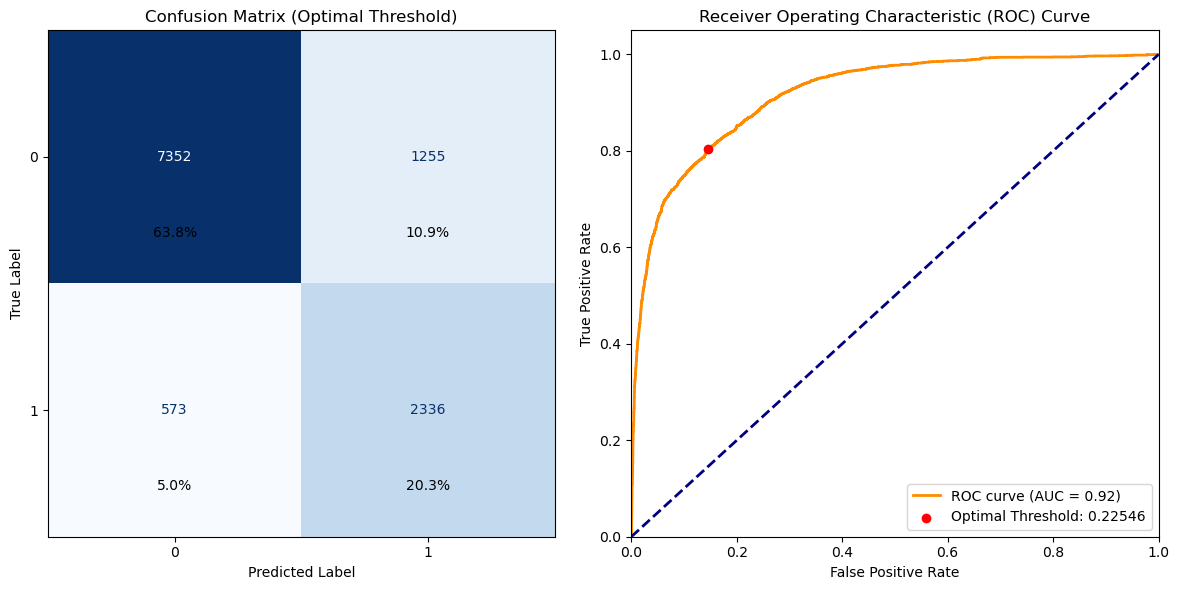

In [283]:
final_model_score = compute_metrics(rf_model_3_2, X_train, y_train, X_test, y_test, scorer=scorer, model_name="Random Forest 3.2 (Final Model)")

In [284]:
results3 = pd.concat([results3, final_model_score], axis=0)

In [285]:
results3

,Model,Train_CV,Accuracy,Precision,Recall,F1-Score,Best Threshold (J-statistic)
0,Random Forest 3.2 (Final Model),Test,0.841264,0.650515,0.803025,0.718769,0.225456


We see that the Recall is around 0.8. A recall of 0.8 means that the model correctly predicts in 80% of cases with actual personal injury (class 1) that it is an accident with personal injury. However, 20% of accidents with personal injury are overlooked (false negatives).

Let's adjust the threshold to improve the recall. Therefore we adjust our function compute_metrics a little bit:

In [286]:
def compute_metrics2(model, X_train, y_train, X_test, y_test, scorer, model_name=None):
    # Extract the names from the scorer dictionary
    scorer_names = list(scorer.keys())

    # Fit the model to the training set
    model.fit(X_train, y_train)
    
    ### Visualization and Metric Calculation ###
    # Predict probabilities (for ROC curve and custom thresholding)
    y_probs = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # define optimal threshold
    optimal_threshold = 0.2

    # Find the index of the threshold closest to the optimal threshold
    optimal_idx = np.argmin(np.abs(thresholds - optimal_threshold))

    # Predict labels using the optimal threshold
    y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

    # Create a dictionary for the pandas dataframe
    test_scores = {"Model": model_name, "Train_CV": "Test", "Best Threshold (J-statistic)": optimal_threshold}
    
    # Calculate the metrics for the optimal threshold
    test_scores["Accuracy"] = accuracy(y_test, y_pred_optimal)
    test_scores["Precision"] = precision(y_test, y_pred_optimal)
    test_scores["Recall"] = recall(y_test, y_pred_optimal)
    test_scores["F1-Score"] = f1(y_test, y_pred_optimal)

    # Append the results to the dataframe
    test_scores = pd.DataFrame(test_scores, index=[0])
    # Compute confusion matrix for the optimal threshold
    cm = confusion_matrix(y_test, y_pred_optimal)

    # Compute ROC area
    roc_auc = auc(fpr, tpr)

    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax1, cmap='Blues', colorbar=False)
    ax1.set_title('Confusion Matrix (Optimal Threshold)')
    ax1.set_xlabel('Predicted Label')
    ax1.set_ylabel('True Label')
    ax1.grid(False)

    # Calculate percentages for the confusion matrix
    cm_percent = cm / cm.sum() * 100  # Divide each cell by the total sum of the matrix to get percentages

    # Annotate with percentages below the numbers
    for i in range(cm.shape[0]):  # Iterate over rows
        for j in range(cm.shape[1]):  # Iterate over columns
            percentage = f"{cm_percent[i, j]:.1f}%"  # Format percentage
            ax1.text(j, i + 0.3, percentage, ha="center", va="center", fontsize=10, color="black")  # Add below numbers

    # Plot ROC curve
    ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax2.scatter(fpr[optimal_idx], tpr[optimal_idx], color="red", 
                label=f"Optimal Threshold: {optimal_threshold:.5f}", zorder=5)
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax2.legend(loc='lower right')

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

    return test_scores

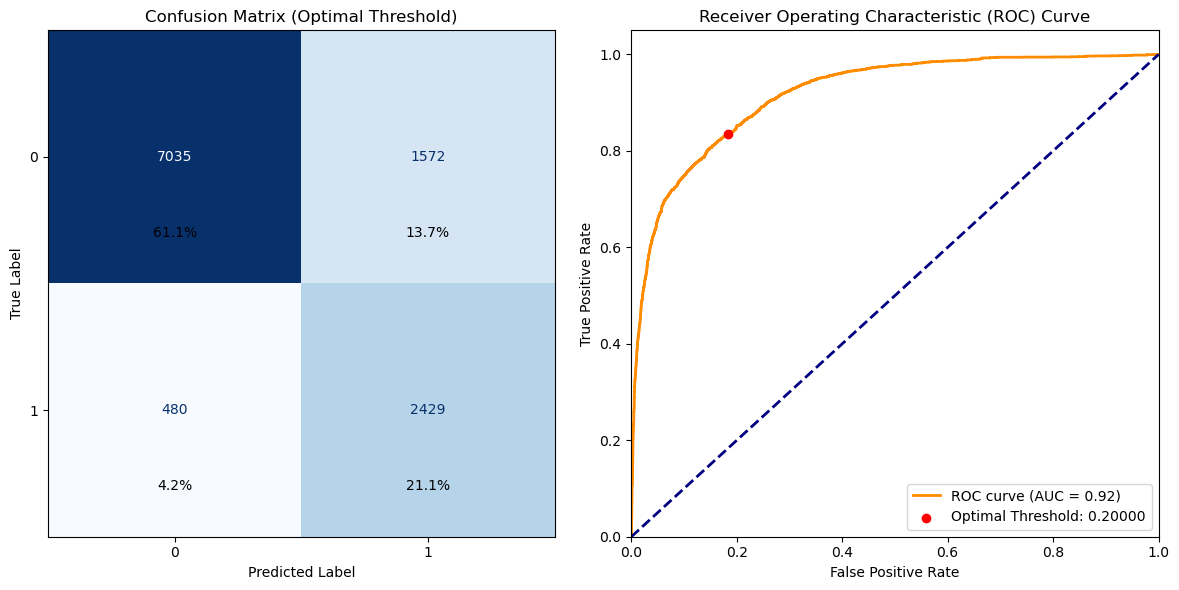

In [ ]:
final_model_threshold1 = compute_metrics2(rf_model_3_2, X_train, y_train, X_test, y_test, scorer=scorer, model_name="Random Forest 3.2 (adj. Threshold)")

In [288]:
results3 = pd.concat([results3, final_model_threshold1], axis=0)

In [289]:
results3

,Model,Train_CV,Accuracy,Precision,Recall,F1-Score,Best Threshold (J-statistic)
0,Random Forest 3.2 (Final Model),Test,0.841264,0.650515,0.803025,0.718769,0.225456
0,Random Forest 3.2 (adj. Threshold),Test,0.821813,0.607098,0.834995,0.703039,0.200000


We see that with lowering the Threshold we can improve our recall from 0.80 to 0.83. But we have much more accidents with property damage that we wrongly predict as accident with personal injury = False Positives (from 10.9% to 13.7%) while we have only reduced actual accidents with personal injury that we wrongly predict as property damage by 0.8% = False Negatives (from 5% to 4.2%). We discussed in the group wether we want to accept this trade-off or not. 

More False Negatives (An accident that is actually serious (personal injury) is classified as harmless material damage) can mean that the measures that would be necessary in the event of serious accidents (e.g. deployment of rescue services, specific analyses or warning systems) are not taken. This has potentially serious consequences.

We therefore came to the conclusion that we should set the threshold value to 0.2. In doing so, we accept that we achieve a slightly lower precision. A precision score of 0.61 means that of all accidents predicted by the model as personal injury (class 1), 61% are actually personal injury accidents. The remaining 39% of the cases predicted as personal injury are actually accidents with property damage (class 0) - i.e. false positives. In our opinion, this is more in line with the interests of our web application users, namely ambulances.

# 5. Save the best Model

In [ ]:
# you can add you own file path here
filename = '/Users/elocher/Computer_Science/FCS_Group/Data_for_modeling/finalized_model.sav'
pickle.dump(rf_model_3_2, open(filename, 'wb')) # write binary, so serialized object is saved as steam of bits on our disk

## Load Model and Score "New accident" data -> this part of the code is for the app.py File!

In [ ]:
# read in the "new" accident data
new_accidents = pd.read_csv("/Users/elocher/Computer_Science/FCS_Group/Data_for_modeling/new_accidents.csv") # add desired path

In [ ]:
loaded_model = pickle.load(open(filename, 'rb')) # read binary
loaded_model.predict(new_accidents) # predict with loaded model